In [11]:
#載入所需函示庫
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 80
import seaborn as sns
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import statsmodels
import warnings
warnings.filterwarnings("ignore")

def c_of_c_test(r, n, a):
    t_value = r * ((n-2)/(1 - r**2)) ** 0.5
    t_critical = stats.t.ppf(1 - a/2, n - 2)
    pval = stats.t.sf(np.abs(t_value), n - 2)*2
    print('r = ', r)
    print('t_critical = ', t_critical)
    print('t = ', t_value)
    print('p_value = ', pval)
    return t_value

def CI_simple_regression(df,x, y, x1, a):
    x_new = np.array([1, x1])
    X2 = sm.add_constant(x)
    olsmod = sm.OLS(y, X2)
    result_reg = olsmod.fit()
    #point prediction value
    y_head = np.dot(df.params, x_new)
    print("y_head = ", y_head)
    (t_minus, t_plus) = stats.t.interval(alpha = (1.0 - a), df = result_reg.df_resid )
    cov_mat1 = np.cov(y, x)
    x_bar = x.mean()
    core1 = (1 / result_reg.nobs + 
         (x1 - x_bar) ** 2 / (result_reg.nobs - 1) /    cov_mat1[1,1] ) ** 0.5
    lower_bound = y_head + t_minus * (result_reg.mse_resid ** 0.5) * core1
    upper_bound = y_head + t_plus * (result_reg.mse_resid ** 0.5) * core1
    half_interval = t_plus * (result_reg.mse_resid ** 0.5) * core1
    CI = np.array([lower_bound, upper_bound])
    print(f"{100*(1-a)}%% confidence interval for mean: [%0.4f, %0.4f]" % (lower_bound, upper_bound))
    print("    or %0.4f  +- %0.4f" % (y_head, half_interval))
    return CI

def PI_simple_regression(df,x, y, x1, a):
    x_new = np.array([1, x1])
    print("make prediction at new x = ", x1)
    X2 = sm.add_constant(x)
    olsmod = sm.OLS(y, X2)
    result_reg = olsmod.fit()
    y_head = np.dot(df.params, x_new)
    print("y_head = ", y_head)
    (t_minus, t_plus) = stats.t.interval(alpha = (1.0 - a), df = result_reg.df_resid )
    cov_mat1 = np.cov(y, x)
    x_bar = x.mean()
    core2 = (1 + 1 / result_reg.nobs + 
         (x1 - x_bar) ** 2 / (result_reg.nobs - 1) / cov_mat1[1,1] ) ** 0.5
    lower_bound = y_head + t_minus * (result_reg.mse_resid ** 0.5) * core2
    upper_bound = y_head + t_plus * (result_reg.mse_resid ** 0.5) * core2
    half_interval = t_plus * (result_reg.mse_resid ** 0.5) * core2
    PI = np.array([lower_bound, upper_bound])
    print(f"{100*(1-a)}%% prediction interval: [%0.4f, %0.4f]" % (lower_bound, upper_bound))
    print("    or %0.4f  +- %0.4f" % (y_head, half_interval))
    return PI

def Chi_Square_for_Normality(SD, N, a): 
    m = np.mean(SD)
    s = np.std(SD)   
    prob_bins = np.zeros((N + 1))
    z_bins = np.zeros((N + 1))
    z_bins[0] = -4
    z_bins[N] = 4
    for i in range(0, N+1):
        prob_bins[i] = i/N
    for j in range(1, N):
        z_bins[j] = m + stats.norm.isf(1 - prob_bins[j]) * s 
    counts, bins = np.histogram(SD, bins=z_bins)
    nobs = counts.sum()
    prob_e = np.zeros((N))
    for i in range(1, N+1):
        prob_e[i - 1] = prob_bins[i] - prob_bins[i - 1]
    freq_e = nobs * prob_e
    freq_o = counts
    if np.sum(freq_e < 5) > 0:
        print("Rule of five is not met. ")
        chi_pval = -99999 # Invalid
    else:
        chi_stat, pval = stats.chisquare(freq_o, freq_e) 
        chi_pval = stats.chi2.sf(chi_stat, N - 3)
        print("Chi-squared test: statistics = %0.4f, p-value = %0.4f" % (chi_stat, chi_pval))
    df = N - 3
    crit_value = stats.chi2.ppf(1 - a, df)
    print("Critical value = %0.4f (defree of freedom = %d)" % (crit_value, df))
    return chi_pval


def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1     
    # Checking for start of new run 
    for i in range(1,len(l)): 
        # no. of runs 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
            # print(i, runs)
        # no. of positive values 
        if(l[i]) >= l_median: 
            n1 += 1   
        # no. of negative values 
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

def CI_PI_regression(xdata, yval, x1, a):
    print("make CI and PI prediction at mean of x = ", x1)
    X_data_T = xdata.T
    X_data2 = sm.add_constant(X_data_T)
    olsmod = sm.OLS(yval, X_data2)
    result_reg = olsmod.fit()
    y_head = np.dot(result_reg.params, x1)
    print("y_head = ", y_head)
    (t_minus, t_plus) = stats.t.interval(alpha = (1.0 - a), df = result_reg.df_resid )
    core1 = (result_reg.mse_resid * np.matmul(x1, np.linalg.solve(np.matmul(X_data2.T, X_data2), x1))) ** 0.5
    lower_bound = y_head +  t_minus * core1
    upper_bound = y_head +  t_plus * core1
    print("confidence interval of mean = [%0.4f, %0.4f] " % (lower_bound, upper_bound))
    core2 = (result_reg.mse_resid * (1 + np.matmul(x1, np.linalg.solve(np.matmul(X_data2.T, X_data2), x1)))) ** 0.5
    lower_bound2 = y_head +  t_minus * core2
    upper_bound2 = y_head +  t_plus * core2
    print("Prediction interval = [%0.4f, %0.4f] " % (lower_bound2, upper_bound2))
    CI_PI = np.array([lower_bound, upper_bound, lower_bound2, upper_bound2])
    return CI_PI

def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

def value_to_int(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return int(float(x.replace('K', '')) * 1000)
        return 1000
    if 'M' in x:
        if len(x) > 1:
            return int(float(x.replace('M', '')) * 1000000)
        return 1000000
    if 'B' in x:
        return int(float(x.replace('B', '')) * 1000000000)
    if ' ' in x:
        return int(float(x.replace(' ','')))
    return int(x)



In [12]:
df = pd.read_excel('output.xlsx')
display(df)

,Unnamed: 0,Website,Trustworthiness,Avg_Daily_Visitors,Child_Safety,Avg_Daily_Pageviews,Privacy,Facebook_likes,Twitter_mentions,Google_pluses,LinkedIn_mentions,Pinterest_pins,StumbleUpon_views,Traffic_Rank,Location,Hosted_by,country
0,0,www.google.com.af,Excellent,NaN,Excellent,NaN,Excellent,9,1,37,7,-,7,954,United States,Google Inc.,Afghanistan
1,1,www.google.com,Excellent,515 007 350,Excellent,4 192 159 833,Excellent,94.2K,11.2K,11.7M,1.67K,10.8K,246K,1,United States,Google Inc.,Afghanistan
2,2,www.youtube.com,Excellent,506 457 282,Excellent,2 679 159 025,Excellent,13.5K,16.5K,19.3M,60K,47,329K,2,United States,Google Inc.,Afghanistan
3,3,www.facebook.com,Excellent,270 071 255,Good,1 082 985 733,Excellent,5.87M,64.4K,127K,6.23K,4.15K,23.1K,3,Ireland,Facebook,Afghanistan
4,4,www.yahoo.com,Excellent,99 572 035,Excellent,383 352 336,Excellent,17.2K,1.11K,798K,7.5K,433,68.9K,6,United States,Yahoo! Inc.,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3396,3396,www.propertybook.co.zw,Unknown,505,Unknown,1 009,Unknown,2,-,-,86,-,1,438 021,United States,"CloudFlare, Inc.",Zimbabwe
3397,3397,www.dailynews.co.zw,Unknown,11 902,Unknown,28 566,Unknown,-,27,42,5,-,-,85 166,Ireland,"Amazon.com, Inc.",Zimbabwe
3398,3398,www.newsdzezimbabwe.co.uk,Unknown,11 862,Unknown,51 010,Unknown,-,15,3,-,-,-,77 934,United States,Google Inc.,Zimbabwe
3399,3399,www.nehandaradio.com,Unknown,9 946,Unknown,19 894,Unknown,3,256,214,4,-,1,58 327,United States,"CloudFlare, Inc.",Zimbabwe


## 對Pageviews而言Google的 R-squared值最高，用它來做

<div style="background-color:#D9D9D9;"><font size="5">同時符合outliers & influential才刪, 10次</font></div>
<br> ### 最終結果為R-squared = 0.004

,Avg_Daily_Pageviews,Google_pluses,Website
0,2679159025,19300000,www.youtube.com
1,4192159833,11700000,www.google.com
2,324075,11700000,www.blogspot.co.za
3,66313,11700000,www.blogspot.si
4,157113,11700000,www.blogspot.rs
...,...,...,...
2802,1512693,1,www.unisa.ac.za
2803,181597,1,www.boxden.com
2804,3604824,1,www.thevideo.me
2805,5047,1,www.puntlandpost.net


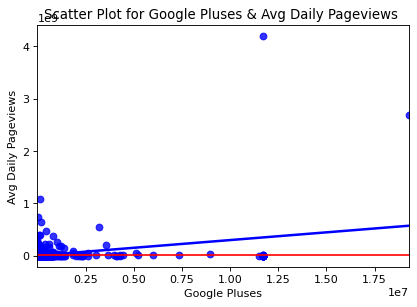

                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.106
Model:                             OLS   Adj. R-squared:                  0.105
Method:                  Least Squares   F-statistic:                     331.7
Date:                 Mon, 16 May 2022   Prob (F-statistic):           3.81e-70
Time:                         16:11:08   Log-Likelihood:                -55580.
No. Observations:                 2807   AIC:                         1.112e+05
Df Residuals:                     2805   BIC:                         1.112e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.015e+06   1.83e+06 

,Avg_Daily_Pageviews,Google_pluses,Website
23,16460152,6020000,www.theguardian.com
24,11742601,5230000,www.tripadvisor.com
25,47708803,5100000,www.booking.com
26,21869953,4420000,www.nytimes.com
27,5081623,4270000,www.nba.com
...,...,...,...
2802,1512693,1,www.unisa.ac.za
2803,181597,1,www.boxden.com
2804,3604824,1,www.thevideo.me
2805,5047,1,www.puntlandpost.net


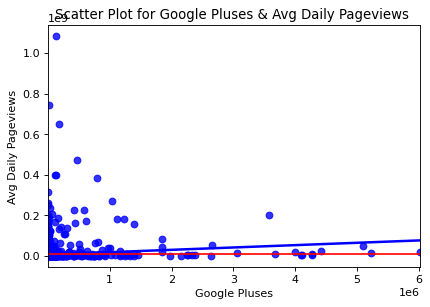

try:  1
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.011
Model:                             OLS   Adj. R-squared:                  0.011
Method:                  Least Squares   F-statistic:                     30.55
Date:                 Mon, 16 May 2022   Prob (F-statistic):           3.56e-08
Time:                         16:11:09   Log-Likelihood:                -52535.
No. Observations:                 2783   AIC:                         1.051e+05
Df Residuals:                     2781   BIC:                         1.051e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.331e+06   7

,Avg_Daily_Pageviews,Google_pluses,Website
0,16460152,6020000,www.theguardian.com
1,11742601,5230000,www.tripadvisor.com
2,47708803,5100000,www.booking.com
3,21869953,4420000,www.nytimes.com
4,5081623,4270000,www.nba.com
...,...,...,...
2778,1512693,1,www.unisa.ac.za
2779,181597,1,www.boxden.com
2780,3604824,1,www.thevideo.me
2781,5047,1,www.puntlandpost.net


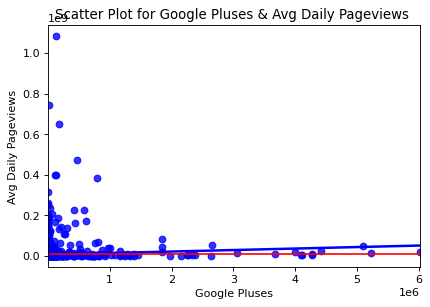

try:  2
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.004
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     12.21
Date:                 Mon, 16 May 2022   Prob (F-statistic):           0.000482
Time:                         16:11:09   Log-Likelihood:                -52386.
No. Observations:                 2778   AIC:                         1.048e+05
Df Residuals:                     2776   BIC:                         1.048e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.259e+06   7

,Avg_Daily_Pageviews,Google_pluses,Website
0,16460152,6020000,www.theguardian.com
1,11742601,5230000,www.tripadvisor.com
2,47708803,5100000,www.booking.com
3,21869953,4420000,www.nytimes.com
4,5081623,4270000,www.nba.com
...,...,...,...
2773,1512693,1,www.unisa.ac.za
2774,181597,1,www.boxden.com
2775,3604824,1,www.thevideo.me
2776,5047,1,www.puntlandpost.net


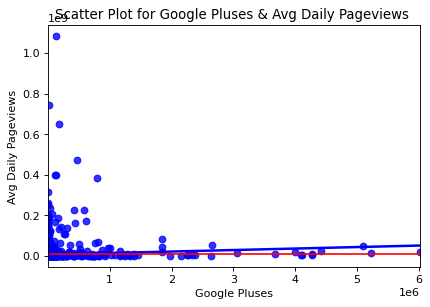

try:  3
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.004
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     12.21
Date:                 Mon, 16 May 2022   Prob (F-statistic):           0.000482
Time:                         16:11:09   Log-Likelihood:                -52386.
No. Observations:                 2778   AIC:                         1.048e+05
Df Residuals:                     2776   BIC:                         1.048e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.259e+06   7

,Avg_Daily_Pageviews,Google_pluses,Website
0,16460152,6020000,www.theguardian.com
1,11742601,5230000,www.tripadvisor.com
2,47708803,5100000,www.booking.com
3,21869953,4420000,www.nytimes.com
4,5081623,4270000,www.nba.com
...,...,...,...
2773,1512693,1,www.unisa.ac.za
2774,181597,1,www.boxden.com
2775,3604824,1,www.thevideo.me
2776,5047,1,www.puntlandpost.net


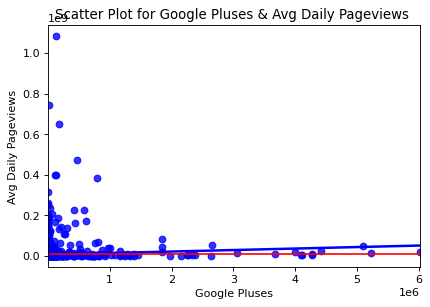

try:  4
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.004
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     12.21
Date:                 Mon, 16 May 2022   Prob (F-statistic):           0.000482
Time:                         16:11:10   Log-Likelihood:                -52386.
No. Observations:                 2778   AIC:                         1.048e+05
Df Residuals:                     2776   BIC:                         1.048e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.259e+06   7

,Avg_Daily_Pageviews,Google_pluses,Website
0,16460152,6020000,www.theguardian.com
1,11742601,5230000,www.tripadvisor.com
2,47708803,5100000,www.booking.com
3,21869953,4420000,www.nytimes.com
4,5081623,4270000,www.nba.com
...,...,...,...
2773,1512693,1,www.unisa.ac.za
2774,181597,1,www.boxden.com
2775,3604824,1,www.thevideo.me
2776,5047,1,www.puntlandpost.net


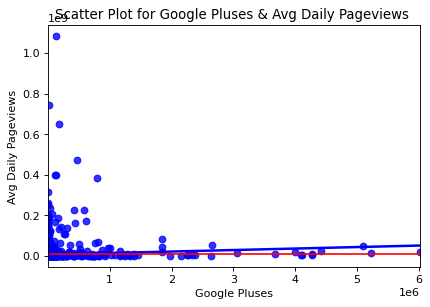

try:  5
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.004
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     12.21
Date:                 Mon, 16 May 2022   Prob (F-statistic):           0.000482
Time:                         16:11:10   Log-Likelihood:                -52386.
No. Observations:                 2778   AIC:                         1.048e+05
Df Residuals:                     2776   BIC:                         1.048e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.259e+06   7

,Avg_Daily_Pageviews,Google_pluses,Website
0,16460152,6020000,www.theguardian.com
1,11742601,5230000,www.tripadvisor.com
2,47708803,5100000,www.booking.com
3,21869953,4420000,www.nytimes.com
4,5081623,4270000,www.nba.com
...,...,...,...
2773,1512693,1,www.unisa.ac.za
2774,181597,1,www.boxden.com
2775,3604824,1,www.thevideo.me
2776,5047,1,www.puntlandpost.net


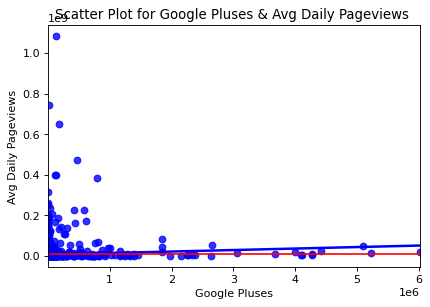

try:  6
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.004
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     12.21
Date:                 Mon, 16 May 2022   Prob (F-statistic):           0.000482
Time:                         16:11:10   Log-Likelihood:                -52386.
No. Observations:                 2778   AIC:                         1.048e+05
Df Residuals:                     2776   BIC:                         1.048e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.259e+06   7

,Avg_Daily_Pageviews,Google_pluses,Website
0,16460152,6020000,www.theguardian.com
1,11742601,5230000,www.tripadvisor.com
2,47708803,5100000,www.booking.com
3,21869953,4420000,www.nytimes.com
4,5081623,4270000,www.nba.com
...,...,...,...
2773,1512693,1,www.unisa.ac.za
2774,181597,1,www.boxden.com
2775,3604824,1,www.thevideo.me
2776,5047,1,www.puntlandpost.net


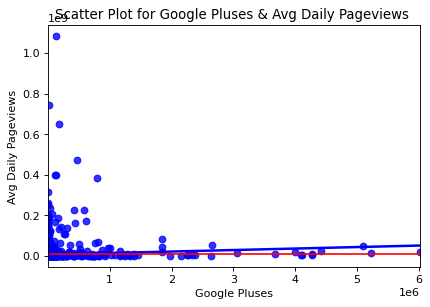

try:  7
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.004
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     12.21
Date:                 Mon, 16 May 2022   Prob (F-statistic):           0.000482
Time:                         16:11:11   Log-Likelihood:                -52386.
No. Observations:                 2778   AIC:                         1.048e+05
Df Residuals:                     2776   BIC:                         1.048e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.259e+06   7

,Avg_Daily_Pageviews,Google_pluses,Website
0,16460152,6020000,www.theguardian.com
1,11742601,5230000,www.tripadvisor.com
2,47708803,5100000,www.booking.com
3,21869953,4420000,www.nytimes.com
4,5081623,4270000,www.nba.com
...,...,...,...
2773,1512693,1,www.unisa.ac.za
2774,181597,1,www.boxden.com
2775,3604824,1,www.thevideo.me
2776,5047,1,www.puntlandpost.net


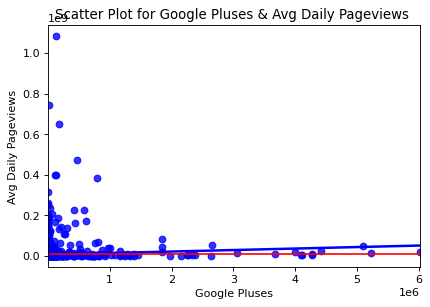

try:  8
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.004
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     12.21
Date:                 Mon, 16 May 2022   Prob (F-statistic):           0.000482
Time:                         16:11:11   Log-Likelihood:                -52386.
No. Observations:                 2778   AIC:                         1.048e+05
Df Residuals:                     2776   BIC:                         1.048e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.259e+06   7

,Avg_Daily_Pageviews,Google_pluses,Website
0,16460152,6020000,www.theguardian.com
1,11742601,5230000,www.tripadvisor.com
2,47708803,5100000,www.booking.com
3,21869953,4420000,www.nytimes.com
4,5081623,4270000,www.nba.com
...,...,...,...
2773,1512693,1,www.unisa.ac.za
2774,181597,1,www.boxden.com
2775,3604824,1,www.thevideo.me
2776,5047,1,www.puntlandpost.net


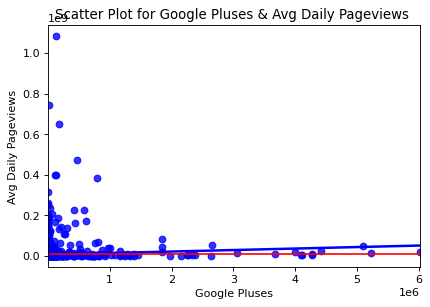

try:  9
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.004
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     12.21
Date:                 Mon, 16 May 2022   Prob (F-statistic):           0.000482
Time:                         16:11:11   Log-Likelihood:                -52386.
No. Observations:                 2778   AIC:                         1.048e+05
Df Residuals:                     2776   BIC:                         1.048e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.259e+06   7

,Avg_Daily_Pageviews,Google_pluses,Website
0,16460152,6020000,www.theguardian.com
1,11742601,5230000,www.tripadvisor.com
2,47708803,5100000,www.booking.com
3,21869953,4420000,www.nytimes.com
4,5081623,4270000,www.nba.com
...,...,...,...
2773,1512693,1,www.unisa.ac.za
2774,181597,1,www.boxden.com
2775,3604824,1,www.thevideo.me
2776,5047,1,www.puntlandpost.net


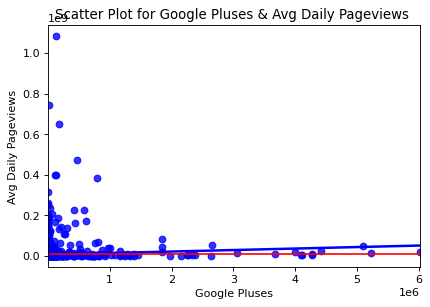

try:  10
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.004
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     12.21
Date:                 Mon, 16 May 2022   Prob (F-statistic):           0.000482
Time:                         16:11:11   Log-Likelihood:                -52386.
No. Observations:                 2778   AIC:                         1.048e+05
Df Residuals:                     2776   BIC:                         1.048e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.259e+06   

In [46]:
#同時符合out+influ才刪
fb = df[df["Google_pluses"].str.contains("-")==False]
fb = fb[['Avg_Daily_Pageviews','Google_pluses','Website']]
fb['Google_pluses'] = fb['Google_pluses'].apply(value_to_int)
fb.dropna(inplace=True)
fb.sort_values(by=['Google_pluses'], ascending = False, inplace=True)
fb.reset_index(inplace = True, drop = True)
fb['Avg_Daily_Pageviews'] = fb['Avg_Daily_Pageviews'].apply(value_to_int)
#fb = fb[100:]
display(fb)
# draw plot
_ = sns.regplot(x='Google_pluses', y= 'Avg_Daily_Pageviews', data = fb, color = 'b', ci = None)
#plt.plot(x=fb['Google_pluses'],y=fb['Avg_Daily_Pageviews'].mean())
plt.axhline(y=fb['Avg_Daily_Pageviews'].mean(), color='r', linestyle='-')
plt.title('Scatter Plot for Google Pluses & Avg Daily Pageviews ')
plt.xlabel('Google Pluses')
plt.ylabel('Avg Daily Pageviews')
plt.show()
# Fit regression model 
fb_result = smf.ols('Avg_Daily_Pageviews~ Google_pluses', data=fb).fit()
# Inspect the results
print(fb_result.summary())
for i in range(10):
    b1 = fb_result.params[1]
    b0 = fb_result.params[0]
    st1, data1, ss3 = sso.summary_table(fb_result, alpha=0.05)
    SD = data1[:, 10]
    mu = np.mean(SD)
    sigma = np.std(SD)
    fb_c = pd.DataFrame(SD,columns = ['SD'])
    filter = (fb_c['SD'] < -2) | (fb_c['SD'] > 2)
    #print("Outliers by SD = \n")
    #print(fb_c['SD'].loc[filter])
    out_index = fb_c['SD'].loc[filter].index
    #out_index
    fb_c = pd.DataFrame(SD,columns = ['SD'])

    #print("\nInfluential Observations \n")
    x_data = fb['Google_pluses'].values
    y_data = fb['Avg_Daily_Pageviews'].values
    cov_mat1 = np.cov(y_data, x_data)
    x_data_bar = x_data.mean()
    data_nobs = len(x_data)
    h_val = 1 / data_nobs + (x_data - x_data_bar) ** 2 / (data_nobs - 1) / cov_mat1[1,1]
    fb_h = pd.DataFrame(h_val,columns = ['hi'])
    filter = (fb_h['hi'] > 6 / data_nobs )
    #print("Influential Observations by hi = \n")
    #print(fb_h['hi'].loc[filter])
    influ_index = fb_h['hi'].loc[filter].index
    #influ_index
    #new fb
    cross = list(set(influ_index).intersection(out_index))
    print(cross)
    fb.drop(cross, axis=0, inplace=True)
    display(fb)
    # draw plot
    _ = sns.regplot(x='Google_pluses', y= 'Avg_Daily_Pageviews', data = fb, color = 'b', ci = None)
    #plt.plot(x=fb['Google_pluses'],y=fb['Avg_Daily_Pageviews'].mean())
    plt.axhline(y=fb['Avg_Daily_Pageviews'].mean(), color='r', linestyle='-')
    plt.title('Scatter Plot for Google Pluses & Avg Daily Pageviews ')
    plt.xlabel('Google Pluses')
    plt.ylabel('Avg Daily Pageviews')
    plt.show()
    # Fit regression model 
    fb_result = smf.ols('Avg_Daily_Pageviews~ Google_pluses', data=fb).fit()
    # Inspect the results
    print("try: ",i+1)
    print(fb_result.summary())
    fb.reset_index(inplace = True, drop = True)

<div style="background-color:#D9D9D9;"><font size="5"> 純刪除10次outliers</font></div>
<br> ###最終結果為R-squared = 0.602

,Avg_Daily_Pageviews,Google_pluses,Website
0,2679159025,19300000,www.youtube.com
1,4192159833,11700000,www.google.com
2,324075,11700000,www.blogspot.co.za
3,66313,11700000,www.blogspot.si
4,157113,11700000,www.blogspot.rs
...,...,...,...
2802,1512693,1,www.unisa.ac.za
2803,181597,1,www.boxden.com
2804,3604824,1,www.thevideo.me
2805,5047,1,www.puntlandpost.net


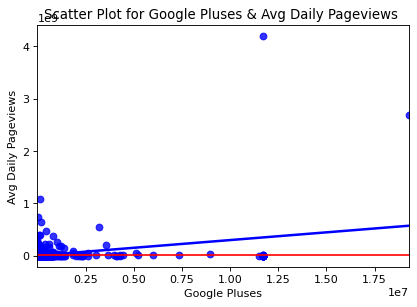

                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.106
Model:                             OLS   Adj. R-squared:                  0.105
Method:                  Least Squares   F-statistic:                     331.7
Date:                 Mon, 16 May 2022   Prob (F-statistic):           3.81e-70
Time:                         16:18:28   Log-Likelihood:                -55580.
No. Observations:                 2807   AIC:                         1.112e+05
Df Residuals:                     2805   BIC:                         1.112e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.015e+06   1.83e+06 

,Avg_Daily_Pageviews,Google_pluses,Website
23,16460152,6020000,www.theguardian.com
24,11742601,5230000,www.tripadvisor.com
25,47708803,5100000,www.booking.com
26,21869953,4420000,www.nytimes.com
27,5081623,4270000,www.nba.com
...,...,...,...
2802,1512693,1,www.unisa.ac.za
2803,181597,1,www.boxden.com
2804,3604824,1,www.thevideo.me
2805,5047,1,www.puntlandpost.net


4780567.785688471


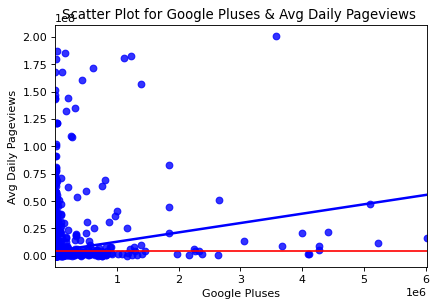

try:  1
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.030
Model:                             OLS   Adj. R-squared:                  0.030
Method:                  Least Squares   F-statistic:                     85.84
Date:                 Mon, 16 May 2022   Prob (F-statistic):           3.81e-20
Time:                         16:18:28   Log-Likelihood:                -49960.
No. Observations:                 2767   AIC:                         9.992e+04
Df Residuals:                     2765   BIC:                         9.993e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.279e+06   3

,Avg_Daily_Pageviews,Google_pluses,Website
2,47708803,5100000,www.booking.com
3,21869953,4420000,www.nytimes.com
5,8614659,4270000,www.huffingtonpost.com
8,20393154,3990000,www.soundcloud.com
9,8819770,3680000,www.weather.com
...,...,...,...
2762,1512693,1,www.unisa.ac.za
2763,181597,1,www.boxden.com
2764,3604824,1,www.thevideo.me
2765,5047,1,www.puntlandpost.net


2279823.293766331


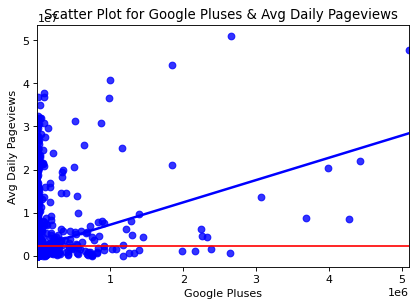

try:  2
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.073
Model:                             OLS   Adj. R-squared:                  0.073
Method:                  Least Squares   F-statistic:                     212.1
Date:                 Mon, 16 May 2022   Prob (F-statistic):           2.71e-46
Time:                         16:18:28   Log-Likelihood:                -45111.
No. Observations:                 2679   AIC:                         9.023e+04
Df Residuals:                     2677   BIC:                         9.024e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.041e+06   9

,Avg_Daily_Pageviews,Google_pluses,Website
1,21869953,4420000,www.nytimes.com
3,20393154,3990000,www.soundcloud.com
5,13691154,3060000,www.airbnb.com
9,4286818,2330000,www.vice.com
10,4486801,2260000,www.youm7.com
...,...,...,...
2674,1512693,1,www.unisa.ac.za
2675,181597,1,www.boxden.com
2676,3604824,1,www.thevideo.me
2677,5047,1,www.puntlandpost.net


1264123.719637224


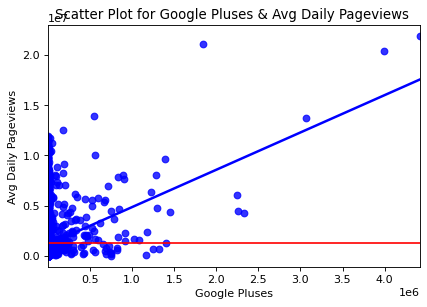

try:  3
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.119
Model:                             OLS   Adj. R-squared:                  0.119
Method:                  Least Squares   F-statistic:                     342.5
Date:                 Mon, 16 May 2022   Prob (F-statistic):           8.15e-72
Time:                         16:18:29   Log-Likelihood:                -40447.
No. Observations:                 2536   AIC:                         8.090e+04
Df Residuals:                     2534   BIC:                         8.091e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.137e+06   4

,Avg_Daily_Pageviews,Google_pluses,Website
2,13691154,3060000,www.airbnb.com
5,6102050,2250000,www.ndtv.com
7,4338096,1450000,www.zomato.com
9,9588936,1390000,www.espncricinfo.com
11,4712423,1300000,www.elmundo.es
...,...,...,...
2531,1512693,1,www.unisa.ac.za
2532,181597,1,www.boxden.com
2533,3604824,1,www.thevideo.me
2534,5047,1,www.puntlandpost.net


845097.2703269069


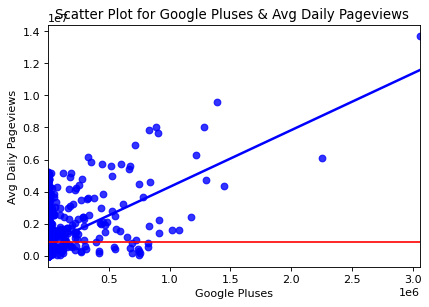

try:  4
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.166
Model:                             OLS   Adj. R-squared:                  0.165
Method:                  Least Squares   F-statistic:                     472.9
Date:                 Mon, 16 May 2022   Prob (F-statistic):           8.35e-96
Time:                         16:18:29   Log-Likelihood:                -36638.
No. Observations:                 2386   AIC:                         7.328e+04
Df Residuals:                     2384   BIC:                         7.329e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.505e+05   2

,Avg_Daily_Pageviews,Google_pluses,Website
2,4338096,1450000,www.zomato.com
4,4712423,1300000,www.elmundo.es
6,6307161,1220000,www.elpais.com
11,2230581,912000,www.mbc.net
14,4614996,841000,www.appledaily.com.tw
...,...,...,...
2380,354014,1,www.school.nz
2381,1512693,1,www.unisa.ac.za
2382,181597,1,www.boxden.com
2384,5047,1,www.puntlandpost.net


586959.4308390022


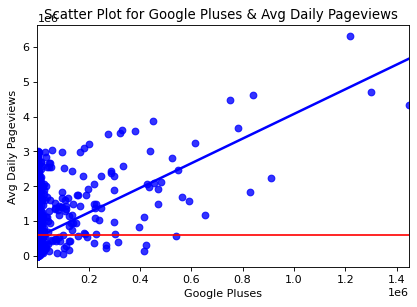

try:  5
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.154
Model:                             OLS   Adj. R-squared:                  0.154
Method:                  Least Squares   F-statistic:                     402.2
Date:                 Mon, 16 May 2022   Prob (F-statistic):           2.60e-82
Time:                         16:18:29   Log-Likelihood:                -32796.
No. Observations:                 2205   AIC:                         6.560e+04
Df Residuals:                     2203   BIC:                         6.561e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.326e+05   1

,Avg_Daily_Pageviews,Google_pluses,Website
1,4712423,1300000,www.elmundo.es
4,4614996,841000,www.appledaily.com.tw
6,3671485,781000,www.soccerway.com
7,4466291,749000,www.independent.co.uk
9,3245880,614000,www.infobae.com
...,...,...,...
2200,354014,1,www.school.nz
2201,1512693,1,www.unisa.ac.za
2202,181597,1,www.boxden.com
2203,5047,1,www.puntlandpost.net


436078.5841098578


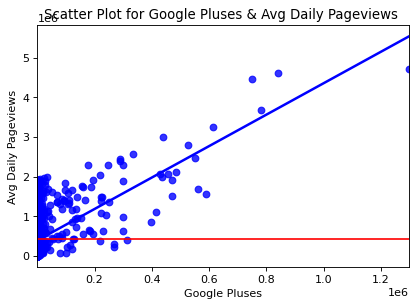

try:  6
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.236
Model:                             OLS   Adj. R-squared:                  0.235
Method:                  Least Squares   F-statistic:                     627.9
Date:                 Mon, 16 May 2022   Prob (F-statistic):          5.15e-121
Time:                         16:18:29   Log-Likelihood:                -29527.
No. Observations:                 2039   AIC:                         5.906e+04
Df Residuals:                     2037   BIC:                         5.907e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.892e+05   1

,Avg_Daily_Pageviews,Google_pluses,Website
0,4712423,1300000,www.elmundo.es
1,4614996,841000,www.appledaily.com.tw
2,3671485,781000,www.soccerway.com
4,3245880,614000,www.infobae.com
6,1697292,563000,www.liputan6.com
...,...,...,...
2033,76516,1,www.education.lu
2034,354014,1,www.school.nz
2036,181597,1,www.boxden.com
2037,5047,1,www.puntlandpost.net


349958.84035827185


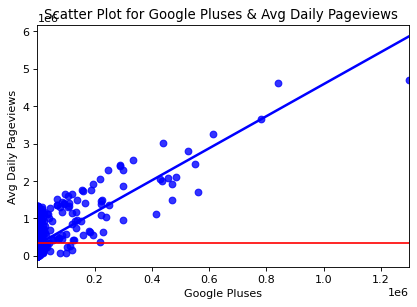

try:  7
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.373
Model:                             OLS   Adj. R-squared:                  0.372
Method:                  Least Squares   F-statistic:                     1126.
Date:                 Mon, 16 May 2022   Prob (F-statistic):          3.47e-194
Time:                         16:18:30   Log-Likelihood:                -26916.
No. Observations:                 1898   AIC:                         5.384e+04
Df Residuals:                     1896   BIC:                         5.385e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.038e+05   8

,Avg_Daily_Pageviews,Google_pluses,Website
2,3671485,781000,www.soccerway.com
3,3245880,614000,www.infobae.com
5,2456203,550000,www.elevenia.co.id
6,2794636,525000,www.rbc.ru
7,2112642,483000,www.guildwars2.com
...,...,...,...
1893,76516,1,www.education.lu
1894,354014,1,www.school.nz
1895,181597,1,www.boxden.com
1896,5047,1,www.puntlandpost.net


276169.85073779797


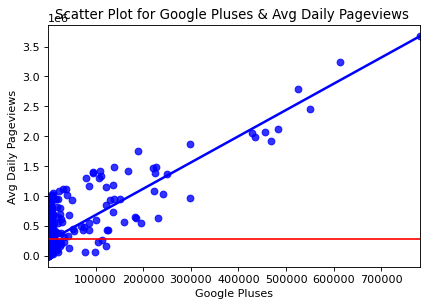

try:  8
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.355
Model:                             OLS   Adj. R-squared:                  0.355
Method:                  Least Squares   F-statistic:                     970.5
Date:                 Mon, 16 May 2022   Prob (F-statistic):          4.57e-170
Time:                         16:18:30   Log-Likelihood:                -24524.
No. Observations:                 1762   AIC:                         4.905e+04
Df Residuals:                     1760   BIC:                         4.906e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.434e+05   6

,Avg_Daily_Pageviews,Google_pluses,Website
0,3671485,781000,www.soccerway.com
1,3245880,614000,www.infobae.com
2,2456203,550000,www.elevenia.co.id
3,2794636,525000,www.rbc.ru
4,2112642,483000,www.guildwars2.com
...,...,...,...
1757,76516,1,www.education.lu
1758,354014,1,www.school.nz
1759,181597,1,www.boxden.com
1760,5047,1,www.puntlandpost.net


229043.83678440924


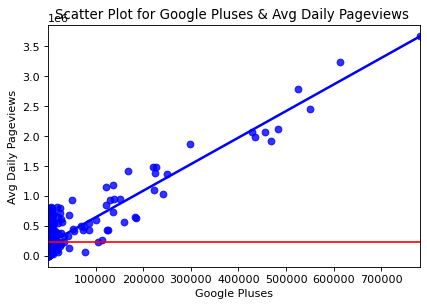

try:  9
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.472
Model:                             OLS   Adj. R-squared:                  0.471
Method:                  Least Squares   F-statistic:                     1465.
Date:                 Mon, 16 May 2022   Prob (F-statistic):          1.54e-229
Time:                         16:18:30   Log-Likelihood:                -22462.
No. Observations:                 1642   AIC:                         4.493e+04
Df Residuals:                     1640   BIC:                         4.494e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.995e+05   5

,Avg_Daily_Pageviews,Google_pluses,Website
0,3671485,781000,www.soccerway.com
1,3245880,614000,www.infobae.com
2,2456203,550000,www.elevenia.co.id
3,2794636,525000,www.rbc.ru
4,2112642,483000,www.guildwars2.com
...,...,...,...
1637,76516,1,www.education.lu
1638,354014,1,www.school.nz
1639,181597,1,www.boxden.com
1640,5047,1,www.puntlandpost.net


195376.75733855186


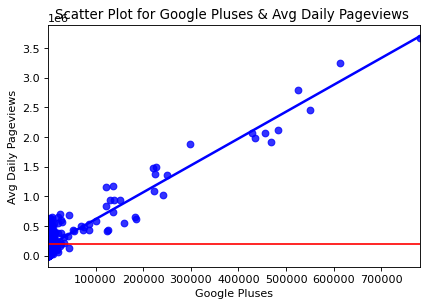

try:  10
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.602
Model:                             OLS   Adj. R-squared:                  0.602
Method:                  Least Squares   F-statistic:                     2319.
Date:                 Mon, 16 May 2022   Prob (F-statistic):          6.52e-309
Time:                         16:18:31   Log-Likelihood:                -20634.
No. Observations:                 1533   AIC:                         4.127e+04
Df Residuals:                     1531   BIC:                         4.128e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.652e+05   

In [48]:
#純刪掉outliers
fb = df[df["Google_pluses"].str.contains("-")==False]
fb = fb[['Avg_Daily_Pageviews','Google_pluses','Website']]
fb['Google_pluses'] = fb['Google_pluses'].apply(value_to_int)
fb.dropna(inplace=True)
fb.sort_values(by=['Google_pluses'], ascending = False, inplace=True)
fb.reset_index(inplace = True, drop = True)
fb['Avg_Daily_Pageviews'] = fb['Avg_Daily_Pageviews'].apply(value_to_int)
#fb = fb[100:]
display(fb)
# draw plot
_ = sns.regplot(x='Google_pluses', y= 'Avg_Daily_Pageviews', data = fb, color = 'b', ci = None)
#plt.plot(x=fb['Google_pluses'],y=fb['Avg_Daily_Pageviews'].mean())
plt.axhline(y=fb['Avg_Daily_Pageviews'].mean(), color='r', linestyle='-')
plt.title('Scatter Plot for Google Pluses & Avg Daily Pageviews ')
plt.xlabel('Google Pluses')
plt.ylabel('Avg Daily Pageviews')
plt.show()
# Fit regression model 
fb_result = smf.ols('Avg_Daily_Pageviews~ Google_pluses', data=fb).fit()
# Inspect the results
print(fb_result.summary())
for i in range(10):
    b1 = fb_result.params[1]
    b0 = fb_result.params[0]
    st1, data1, ss3 = sso.summary_table(fb_result, alpha=0.05)
    SD = data1[:, 10]
    mu = np.mean(SD)
    sigma = np.std(SD)
    fb_c = pd.DataFrame(SD,columns = ['SD'])
    filter = (fb_c['SD'] < -2) | (fb_c['SD'] > 2)
    #print("Outliers by SD = \n")
    #print(fb_c['SD'].loc[filter])
    out_index = fb_c['SD'].loc[filter].index
    #out_index
    out_index = list(out_index)
    print(out_index)
    fb.drop(out_index, axis=0, inplace=True)
    display(fb)
    # draw plot
    _ = sns.regplot(x='Google_pluses', y= 'Avg_Daily_Pageviews', data = fb, color = 'b', ci = None)
    #plt.plot(x=fb['Google_pluses'],y=fb['Avg_Daily_Pageviews'].mean())
    plt.axhline(y=fb['Avg_Daily_Pageviews'].mean(), color='r', linestyle='-')
    plt.title('Scatter Plot for Google Pluses & Avg Daily Pageviews ')
    print(fb['Avg_Daily_Pageviews'].mean())
    plt.xlabel('Google Pluses')
    plt.ylabel('Avg Daily Pageviews')
    plt.show()
    # Fit regression model 
    fb_result = smf.ols('Avg_Daily_Pageviews~ Google_pluses', data=fb).fit()
    # Inspect the results
    print("try: ",i+1)
    print(fb_result.summary())
    fb.reset_index(inplace = True, drop = True)

<div style="background-color:#D9D9D9;"><font size="5"> Pageviews取log＋刪除10次outliers</font></div><br>
### 最終結果為R-squared = 0.014

,Avg_Daily_Pageviews,Google_pluses,Website
0,21.708769,19300000,www.youtube.com
1,22.156482,11700000,www.google.com
2,12.688730,11700000,www.blogspot.co.za
3,11.102141,11700000,www.blogspot.si
4,11.964721,11700000,www.blogspot.rs
...,...,...,...
2802,14.229402,1,www.unisa.ac.za
2803,12.109545,1,www.boxden.com
2804,15.097784,1,www.thevideo.me
2805,8.526549,1,www.puntlandpost.net


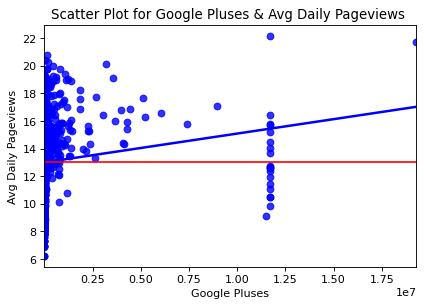

                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.010
Model:                             OLS   Adj. R-squared:                  0.009
Method:                  Least Squares   F-statistic:                     27.55
Date:                 Mon, 16 May 2022   Prob (F-statistic):           1.65e-07
Time:                         16:26:04   Log-Likelihood:                -6395.5
No. Observations:                 2807   AIC:                         1.279e+04
Df Residuals:                     2805   BIC:                         1.281e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.0066      0.045 

,Avg_Daily_Pageviews,Google_pluses,Website
2,12.688730,11700000,www.blogspot.co.za
3,11.102141,11700000,www.blogspot.si
4,11.964721,11700000,www.blogspot.rs
6,12.590723,11700000,www.blogspot.qa
7,12.395825,11700000,www.blogspot.ch
...,...,...,...
2802,14.229402,1,www.unisa.ac.za
2803,12.109545,1,www.boxden.com
2804,15.097784,1,www.thevideo.me
2805,8.526549,1,www.puntlandpost.net


12.96857032805101


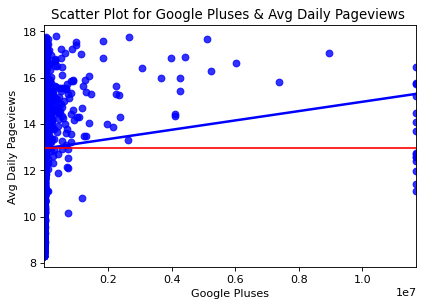

try:  1
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.008
Model:                             OLS   Adj. R-squared:                  0.008
Method:                  Least Squares   F-statistic:                     22.93
Date:                 Mon, 16 May 2022   Prob (F-statistic):           1.77e-06
Time:                         16:26:04   Log-Likelihood:                -5774.7
No. Observations:                 2678   AIC:                         1.155e+04
Df Residuals:                     2676   BIC:                         1.157e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.9430    

,Avg_Daily_Pageviews,Google_pluses,Website
0,12.688730,11700000,www.blogspot.co.za
2,11.964721,11700000,www.blogspot.rs
3,12.590723,11700000,www.blogspot.qa
4,12.395825,11700000,www.blogspot.ch
5,15.201720,11700000,www.blogspot.mx
...,...,...,...
2672,12.777092,1,www.school.nz
2673,14.229402,1,www.unisa.ac.za
2674,12.109545,1,www.boxden.com
2675,15.097784,1,www.thevideo.me


12.968983894748359


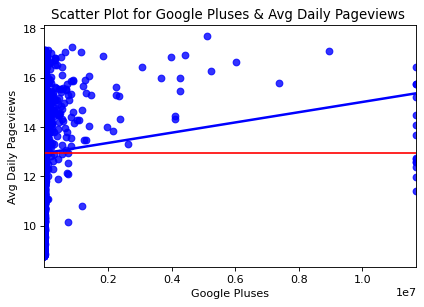

try:  2
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.010
Model:                             OLS   Adj. R-squared:                  0.010
Method:                  Least Squares   F-statistic:                     26.17
Date:                 Mon, 16 May 2022   Prob (F-statistic):           3.35e-07
Time:                         16:26:04   Log-Likelihood:                -5390.4
No. Observations:                 2583   AIC:                         1.078e+04
Df Residuals:                     2581   BIC:                         1.080e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.9433    

,Avg_Daily_Pageviews,Google_pluses,Website
0,12.688730,11700000,www.blogspot.co.za
1,11.964721,11700000,www.blogspot.rs
2,12.590723,11700000,www.blogspot.qa
3,12.395825,11700000,www.blogspot.ch
4,15.201720,11700000,www.blogspot.mx
...,...,...,...
2578,12.777092,1,www.school.nz
2579,14.229402,1,www.unisa.ac.za
2580,12.109545,1,www.boxden.com
2581,15.097784,1,www.thevideo.me


12.973440846585131


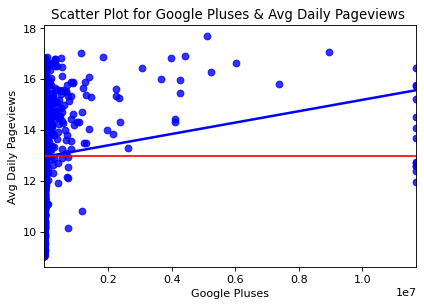

try:  3
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.012
Model:                             OLS   Adj. R-squared:                  0.012
Method:                  Least Squares   F-statistic:                     31.66
Date:                 Mon, 16 May 2022   Prob (F-statistic):           2.04e-08
Time:                         16:26:04   Log-Likelihood:                -5111.5
No. Observations:                 2510   AIC:                         1.023e+04
Df Residuals:                     2508   BIC:                         1.024e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.9462    

,Avg_Daily_Pageviews,Google_pluses,Website
0,12.688730,11700000,www.blogspot.co.za
2,12.590723,11700000,www.blogspot.qa
3,12.395825,11700000,www.blogspot.ch
4,15.201720,11700000,www.blogspot.mx
5,14.487847,11700000,www.blogspot.tw
...,...,...,...
2505,12.777092,1,www.school.nz
2506,14.229402,1,www.unisa.ac.za
2507,12.109545,1,www.boxden.com
2508,15.097784,1,www.thevideo.me


12.984774842812921


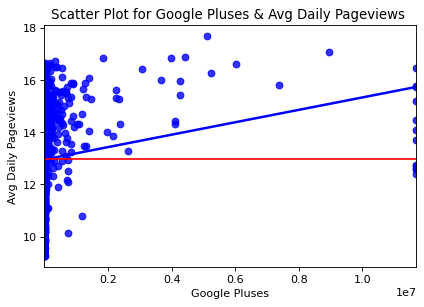

try:  4
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.014
Model:                             OLS   Adj. R-squared:                  0.014
Method:                  Least Squares   F-statistic:                     35.43
Date:                 Mon, 16 May 2022   Prob (F-statistic):           3.02e-09
Time:                         16:26:05   Log-Likelihood:                -4963.9
No. Observations:                 2470   AIC:                             9932.
Df Residuals:                     2468   BIC:                             9943.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.9567    

,Avg_Daily_Pageviews,Google_pluses,Website
0,12.688730,11700000,www.blogspot.co.za
1,12.590723,11700000,www.blogspot.qa
2,12.395825,11700000,www.blogspot.ch
3,15.201720,11700000,www.blogspot.mx
4,14.487847,11700000,www.blogspot.tw
...,...,...,...
2465,12.777092,1,www.school.nz
2466,14.229402,1,www.unisa.ac.za
2467,12.109545,1,www.boxden.com
2468,15.097784,1,www.thevideo.me


12.9924982013669


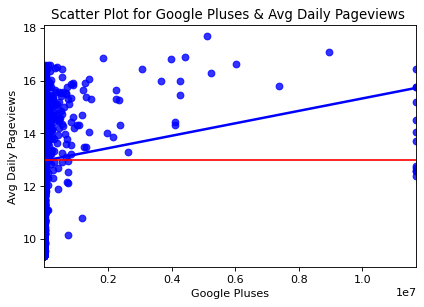

try:  5
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.015
Model:                             OLS   Adj. R-squared:                  0.014
Method:                  Least Squares   F-statistic:                     35.97
Date:                 Mon, 16 May 2022   Prob (F-statistic):           2.30e-09
Time:                         16:26:05   Log-Likelihood:                -4874.1
No. Observations:                 2445   AIC:                             9752.
Df Residuals:                     2443   BIC:                             9764.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.9644    

,Avg_Daily_Pageviews,Google_pluses,Website
0,12.688730,11700000,www.blogspot.co.za
1,12.590723,11700000,www.blogspot.qa
2,12.395825,11700000,www.blogspot.ch
3,15.201720,11700000,www.blogspot.mx
4,14.487847,11700000,www.blogspot.tw
...,...,...,...
2440,12.777092,1,www.school.nz
2441,14.229402,1,www.unisa.ac.za
2442,12.109545,1,www.boxden.com
2443,15.097784,1,www.thevideo.me


13.003204554709702


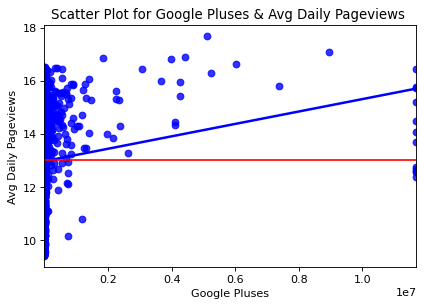

try:  6
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.015
Model:                             OLS   Adj. R-squared:                  0.015
Method:                  Least Squares   F-statistic:                     36.60
Date:                 Mon, 16 May 2022   Prob (F-statistic):           1.68e-09
Time:                         16:26:05   Log-Likelihood:                -4777.9
No. Observations:                 2418   AIC:                             9560.
Df Residuals:                     2416   BIC:                             9571.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.9751    

,Avg_Daily_Pageviews,Google_pluses,Website
0,12.688730,11700000,www.blogspot.co.za
1,12.590723,11700000,www.blogspot.qa
2,12.395825,11700000,www.blogspot.ch
3,15.201720,11700000,www.blogspot.mx
4,14.487847,11700000,www.blogspot.tw
...,...,...,...
2413,12.777092,1,www.school.nz
2414,14.229402,1,www.unisa.ac.za
2415,12.109545,1,www.boxden.com
2416,15.097784,1,www.thevideo.me


13.007319062309895


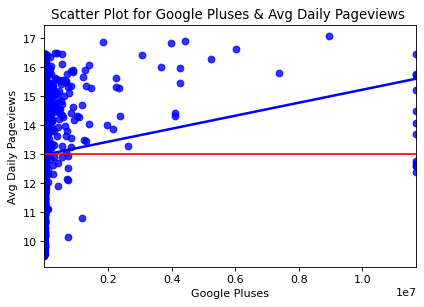

try:  7
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.014
Model:                             OLS   Adj. R-squared:                  0.014
Method:                  Least Squares   F-statistic:                     33.91
Date:                 Mon, 16 May 2022   Prob (F-statistic):           6.56e-09
Time:                         16:26:06   Log-Likelihood:                -4725.0
No. Observations:                 2403   AIC:                             9454.
Df Residuals:                     2401   BIC:                             9466.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.9807    

,Avg_Daily_Pageviews,Google_pluses,Website
0,12.688730,11700000,www.blogspot.co.za
1,12.590723,11700000,www.blogspot.qa
2,12.395825,11700000,www.blogspot.ch
3,15.201720,11700000,www.blogspot.mx
4,14.487847,11700000,www.blogspot.tw
...,...,...,...
2398,12.777092,1,www.school.nz
2399,14.229402,1,www.unisa.ac.za
2400,12.109545,1,www.boxden.com
2401,15.097784,1,www.thevideo.me


13.001440651208194


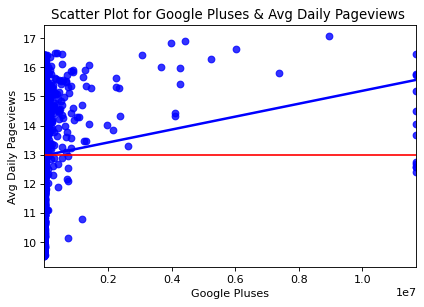

try:  8
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.014
Model:                             OLS   Adj. R-squared:                  0.013
Method:                  Least Squares   F-statistic:                     33.47
Date:                 Mon, 16 May 2022   Prob (F-statistic):           8.18e-09
Time:                         16:26:06   Log-Likelihood:                -4697.1
No. Observations:                 2395   AIC:                             9398.
Df Residuals:                     2393   BIC:                             9410.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.9752    

,Avg_Daily_Pageviews,Google_pluses,Website
0,12.688730,11700000,www.blogspot.co.za
1,12.590723,11700000,www.blogspot.qa
2,12.395825,11700000,www.blogspot.ch
3,15.201720,11700000,www.blogspot.mx
4,14.487847,11700000,www.blogspot.tw
...,...,...,...
2390,12.777092,1,www.school.nz
2391,14.229402,1,www.unisa.ac.za
2392,12.109545,1,www.boxden.com
2393,15.097784,1,www.thevideo.me


12.995729196948497


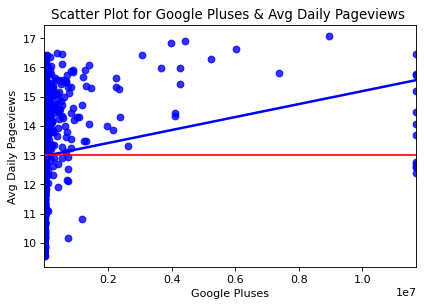

try:  9
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.014
Model:                             OLS   Adj. R-squared:                  0.014
Method:                  Least Squares   F-statistic:                     33.96
Date:                 Mon, 16 May 2022   Prob (F-statistic):           6.39e-09
Time:                         16:26:06   Log-Likelihood:                -4662.3
No. Observations:                 2385   AIC:                             9329.
Df Residuals:                     2383   BIC:                             9340.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.9694    

,Avg_Daily_Pageviews,Google_pluses,Website
0,12.688730,11700000,www.blogspot.co.za
1,12.590723,11700000,www.blogspot.qa
2,12.395825,11700000,www.blogspot.ch
3,15.201720,11700000,www.blogspot.mx
4,14.487847,11700000,www.blogspot.tw
...,...,...,...
2380,12.777092,1,www.school.nz
2381,14.229402,1,www.unisa.ac.za
2382,12.109545,1,www.boxden.com
2383,15.097784,1,www.thevideo.me


12.98852456668833


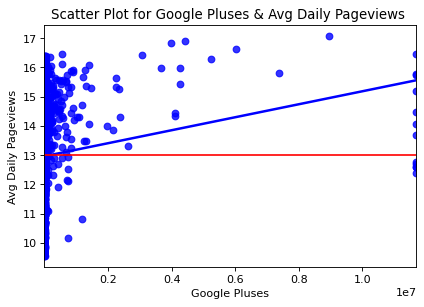

try:  10
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.014
Model:                             OLS   Adj. R-squared:                  0.014
Method:                  Least Squares   F-statistic:                     34.23
Date:                 Mon, 16 May 2022   Prob (F-statistic):           5.58e-09
Time:                         16:26:07   Log-Likelihood:                -4644.9
No. Observations:                 2380   AIC:                             9294.
Df Residuals:                     2378   BIC:                             9305.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.9621   

In [49]:
#純刪掉outliers + log y
fb = df[df["Google_pluses"].str.contains("-")==False]
fb = fb[['Avg_Daily_Pageviews','Google_pluses','Website']]
fb['Google_pluses'] = fb['Google_pluses'].apply(value_to_int)
fb.dropna(inplace=True)
fb.sort_values(by=['Google_pluses'], ascending = False, inplace=True)
fb.reset_index(inplace = True, drop = True)
fb['Avg_Daily_Pageviews'] = fb['Avg_Daily_Pageviews'].apply(value_to_int)
fb['Avg_Daily_Pageviews'] = np.log(fb['Avg_Daily_Pageviews'])
#fb = fb[100:]
display(fb)
# draw plot
_ = sns.regplot(x='Google_pluses', y= 'Avg_Daily_Pageviews', data = fb, color = 'b', ci = None)
#plt.plot(x=fb['Google_pluses'],y=fb['Avg_Daily_Pageviews'].mean())
plt.axhline(y=fb['Avg_Daily_Pageviews'].mean(), color='r', linestyle='-')
plt.title('Scatter Plot for Google Pluses & Avg Daily Pageviews ')
plt.xlabel('Google Pluses')
plt.ylabel('Avg Daily Pageviews')
plt.show()
# Fit regression model 
fb_result = smf.ols('Avg_Daily_Pageviews~ Google_pluses', data=fb).fit()
# Inspect the results
print(fb_result.summary())
for i in range(10):
    b1 = fb_result.params[1]
    b0 = fb_result.params[0]
    st1, data1, ss3 = sso.summary_table(fb_result, alpha=0.05)
    SD = data1[:, 10]
    mu = np.mean(SD)
    sigma = np.std(SD)
    fb_c = pd.DataFrame(SD,columns = ['SD'])
    filter = (fb_c['SD'] < -2) | (fb_c['SD'] > 2)
    #print("Outliers by SD = \n")
    #print(fb_c['SD'].loc[filter])
    out_index = fb_c['SD'].loc[filter].index
    #out_index
    out_index = list(out_index)
    print(out_index)
    fb.drop(out_index, axis=0, inplace=True)
    display(fb)
    # draw plot
    _ = sns.regplot(x='Google_pluses', y= 'Avg_Daily_Pageviews', data = fb, color = 'b', ci = None)
    #plt.plot(x=fb['Google_pluses'],y=fb['Avg_Daily_Pageviews'].mean())
    plt.axhline(y=fb['Avg_Daily_Pageviews'].mean(), color='r', linestyle='-')
    plt.title('Scatter Plot for Google Pluses & Avg Daily Pageviews ')
    print(fb['Avg_Daily_Pageviews'].mean())
    plt.xlabel('Google Pluses')
    plt.ylabel('Avg Daily Pageviews')
    plt.show()
    # Fit regression model 
    fb_result = smf.ols('Avg_Daily_Pageviews~ Google_pluses', data=fb).fit()
    # Inspect the results
    print("try: ",i+1)
    print(fb_result.summary())
    fb.reset_index(inplace = True, drop = True)

,Avg_Daily_Pageviews,Facebook_likes,Website
0,1082985733,5870000,www.facebook.com
1,25618356,166000,www.whatsapp.com
2,293820,94200,www.blogspot.qa
3,1287071,94200,www.blogspot.kr
4,1522948,94200,www.blogspot.ru
...,...,...,...
1478,261003,1,www.diariocorreo.pe
1479,383557,1,www.depor.com
1480,5047,1,www.suribet.sr
1481,9640213,1,www.messenger.com


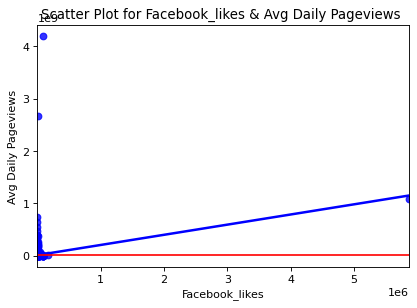

                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.045
Model:                             OLS   Adj. R-squared:                  0.045
Method:                  Least Squares   F-statistic:                     70.14
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.26e-16
Time:                         21:57:32   Log-Likelihood:                -29879.
No. Observations:                 1483   AIC:                         5.976e+04
Df Residuals:                     1481   BIC:                         5.977e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.479e+07   3.54e+

,Avg_Daily_Pageviews,Facebook_likes,Website
1,25618356,166000,www.whatsapp.com
2,293820,94200,www.blogspot.qa
3,1287071,94200,www.blogspot.kr
4,1522948,94200,www.blogspot.ru
5,13932159,94200,www.blogspot.co.id
...,...,...,...
1478,261003,1,www.diariocorreo.pe
1479,383557,1,www.depor.com
1480,5047,1,www.suribet.sr
1481,9640213,1,www.messenger.com


7864705.307744565


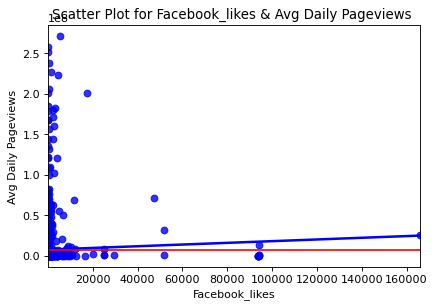

try:  1
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     1.692
Date:                 Tue, 17 May 2022   Prob (F-statistic):              0.194
Time:                         21:57:32   Log-Likelihood:                -27253.
No. Observations:                 1472   AIC:                         5.451e+04
Df Residuals:                     1470   BIC:                         5.452e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.742e+06 

,Avg_Daily_Pageviews,Facebook_likes,Website
0,25618356,166000,www.whatsapp.com
1,293820,94200,www.blogspot.qa
2,1287071,94200,www.blogspot.kr
3,1522948,94200,www.blogspot.ru
4,13932159,94200,www.blogspot.co.id
...,...,...,...
1467,261003,1,www.diariocorreo.pe
1468,383557,1,www.depor.com
1469,5047,1,www.suribet.sr
1470,9640213,1,www.messenger.com


3781481.499298738


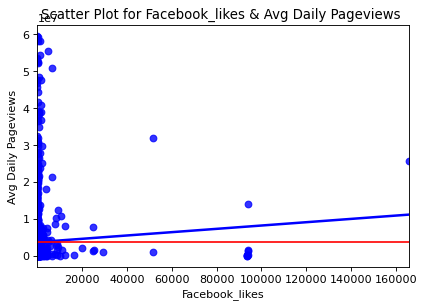

try:  2
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     2.960
Date:                 Tue, 17 May 2022   Prob (F-statistic):             0.0855
Time:                         21:57:33   Log-Likelihood:                -24783.
No. Observations:                 1426   AIC:                         4.957e+04
Df Residuals:                     1424   BIC:                         4.958e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.731e+06 

,Avg_Daily_Pageviews,Facebook_likes,Website
0,25618356,166000,www.whatsapp.com
1,293820,94200,www.blogspot.qa
2,1287071,94200,www.blogspot.kr
3,1522948,94200,www.blogspot.ru
4,13932159,94200,www.blogspot.co.id
...,...,...,...
1421,261003,1,www.diariocorreo.pe
1422,383557,1,www.depor.com
1423,5047,1,www.suribet.sr
1424,9640213,1,www.messenger.com


2112026.1830258304


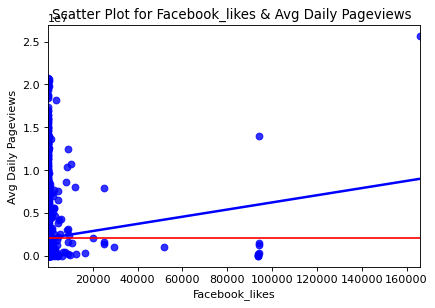

try:  3
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.010
Model:                             OLS   Adj. R-squared:                  0.009
Method:                  Least Squares   F-statistic:                     13.73
Date:                 Tue, 17 May 2022   Prob (F-statistic):           0.000219
Time:                         21:57:33   Log-Likelihood:                -22392.
No. Observations:                 1355   AIC:                         4.479e+04
Df Residuals:                     1353   BIC:                         4.480e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.065e+06 

,Avg_Daily_Pageviews,Facebook_likes,Website
1,293820,94200,www.blogspot.qa
2,1287071,94200,www.blogspot.kr
3,1522948,94200,www.blogspot.ru
5,241790,93700,www.blogspot.ch
6,37237,93700,www.blogspot.ug
...,...,...,...
1349,27035,1,www.politis.com.cy
1350,261003,1,www.diariocorreo.pe
1351,383557,1,www.depor.com
1352,5047,1,www.suribet.sr


1361765.8753918495


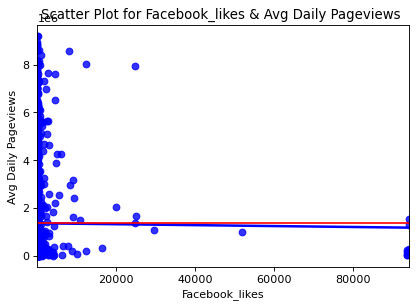

try:  4
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                   0.06656
Date:                 Tue, 17 May 2022   Prob (F-statistic):              0.796
Time:                         21:57:33   Log-Likelihood:                -20297.
No. Observations:                 1276   AIC:                         4.060e+04
Df Residuals:                     1274   BIC:                         4.061e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.364e+06 

,Avg_Daily_Pageviews,Facebook_likes,Website
0,293820,94200,www.blogspot.qa
1,1287071,94200,www.blogspot.kr
2,1522948,94200,www.blogspot.ru
3,241790,93700,www.blogspot.ch
4,37237,93700,www.blogspot.ug
...,...,...,...
1271,27035,1,www.politis.com.cy
1272,261003,1,www.diariocorreo.pe
1273,383557,1,www.depor.com
1274,5047,1,www.suribet.sr


939247.051390059


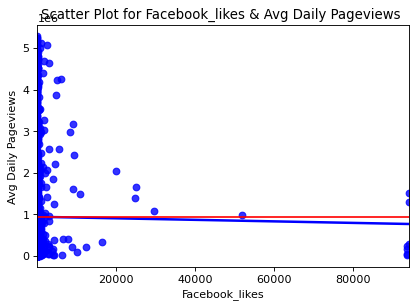

try:  5
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.1547
Date:                 Tue, 17 May 2022   Prob (F-statistic):              0.694
Time:                         21:57:33   Log-Likelihood:                -18315.
No. Observations:                 1187   AIC:                         3.663e+04
Df Residuals:                     1185   BIC:                         3.664e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        9.41e+05 

,Avg_Daily_Pageviews,Facebook_likes,Website
0,293820,94200,www.blogspot.qa
1,1287071,94200,www.blogspot.kr
2,1522948,94200,www.blogspot.ru
3,241790,93700,www.blogspot.ch
4,37237,93700,www.blogspot.ug
...,...,...,...
1182,27035,1,www.politis.com.cy
1183,261003,1,www.diariocorreo.pe
1184,383557,1,www.depor.com
1185,5047,1,www.suribet.sr


687878.6461538462


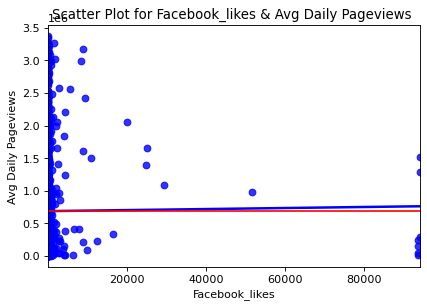

try:  6
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                   0.06483
Date:                 Tue, 17 May 2022   Prob (F-statistic):              0.799
Time:                         21:57:34   Log-Likelihood:                -16597.
No. Observations:                 1105   AIC:                         3.320e+04
Df Residuals:                     1103   BIC:                         3.321e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.871e+05 

,Avg_Daily_Pageviews,Facebook_likes,Website
0,293820,94200,www.blogspot.qa
1,1287071,94200,www.blogspot.kr
2,1522948,94200,www.blogspot.ru
3,241790,93700,www.blogspot.ch
4,37237,93700,www.blogspot.ug
...,...,...,...
1100,27035,1,www.politis.com.cy
1101,261003,1,www.diariocorreo.pe
1102,383557,1,www.depor.com
1103,5047,1,www.suribet.sr


539915.0502901354


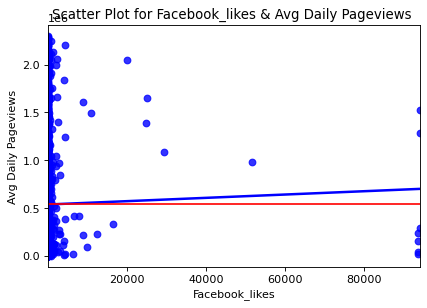

try:  7
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.5769
Date:                 Tue, 17 May 2022   Prob (F-statistic):              0.448
Time:                         21:57:34   Log-Likelihood:                -15207.
No. Observations:                 1034   AIC:                         3.042e+04
Df Residuals:                     1032   BIC:                         3.043e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.381e+05 

,Avg_Daily_Pageviews,Facebook_likes,Website
0,293820,94200,www.blogspot.qa
1,1287071,94200,www.blogspot.kr
2,1522948,94200,www.blogspot.ru
3,241790,93700,www.blogspot.ch
4,37237,93700,www.blogspot.ug
...,...,...,...
1029,27035,1,www.politis.com.cy
1030,261003,1,www.diariocorreo.pe
1031,383557,1,www.depor.com
1032,5047,1,www.suribet.sr


437190.9038262668


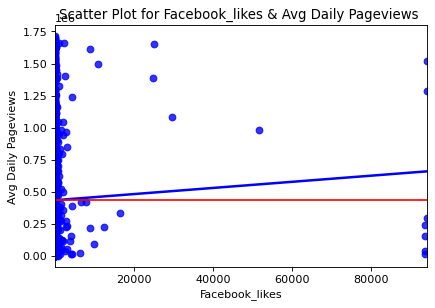

try:  8
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     1.829
Date:                 Tue, 17 May 2022   Prob (F-statistic):              0.177
Time:                         21:57:34   Log-Likelihood:                -13972.
No. Observations:                  967   AIC:                         2.795e+04
Df Residuals:                      965   BIC:                         2.796e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.347e+05 

,Avg_Daily_Pageviews,Facebook_likes,Website
0,293820,94200,www.blogspot.qa
1,1287071,94200,www.blogspot.kr
3,241790,93700,www.blogspot.ch
4,37237,93700,www.blogspot.ug
5,18874,93700,www.blogspot.sn
...,...,...,...
961,922999,1,www.alnilin.com
962,27035,1,www.politis.com.cy
963,261003,1,www.diariocorreo.pe
964,383557,1,www.depor.com


358423.7272727273


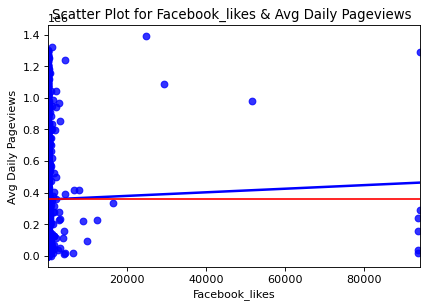

try:  9
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.5639
Date:                 Tue, 17 May 2022   Prob (F-statistic):              0.453
Time:                         21:57:34   Log-Likelihood:                -12820.
No. Observations:                  902   AIC:                         2.564e+04
Df Residuals:                      900   BIC:                         2.565e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.573e+05 

,Avg_Daily_Pageviews,Facebook_likes,Website
0,293820,94200,www.blogspot.qa
2,241790,93700,www.blogspot.ch
3,37237,93700,www.blogspot.ug
4,18874,93700,www.blogspot.sn
5,157113,93700,www.blogspot.rs
...,...,...,...
897,922999,1,www.alnilin.com
898,27035,1,www.politis.com.cy
899,261003,1,www.diariocorreo.pe
900,383557,1,www.depor.com


303088.05200945627


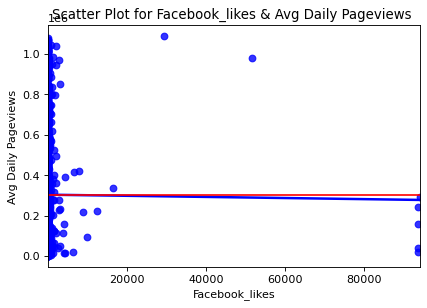

try:  10
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                   0.04088
Date:                 Tue, 17 May 2022   Prob (F-statistic):              0.840
Time:                         21:57:35   Log-Likelihood:                -11864.
No. Observations:                  846   AIC:                         2.373e+04
Df Residuals:                      844   BIC:                         2.374e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.033e+05

,Avg_Daily_Pageviews,Facebook_likes,Website
0,293820,94200,www.blogspot.qa
1,241790,93700,www.blogspot.ch
2,37237,93700,www.blogspot.ug
3,18874,93700,www.blogspot.sn
4,157113,93700,www.blogspot.rs
...,...,...,...
840,24995,1,www.vb.kg
842,27035,1,www.politis.com.cy
843,261003,1,www.diariocorreo.pe
844,383557,1,www.depor.com


258368.6700251889


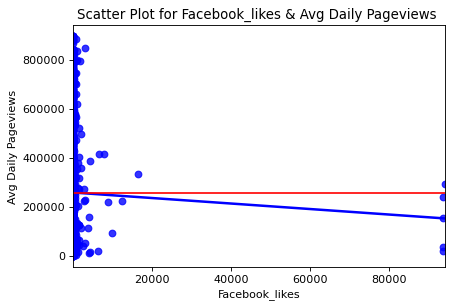

try:  11
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.9047
Date:                 Tue, 17 May 2022   Prob (F-statistic):              0.342
Time:                         21:57:35   Log-Likelihood:                -10991.
No. Observations:                  794   AIC:                         2.199e+04
Df Residuals:                      792   BIC:                         2.200e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.593e+05

,Avg_Daily_Pageviews,Facebook_likes,Website
0,293820,94200,www.blogspot.qa
1,241790,93700,www.blogspot.ch
2,37237,93700,www.blogspot.ug
3,18874,93700,www.blogspot.sn
4,157113,93700,www.blogspot.rs
...,...,...,...
789,24995,1,www.vb.kg
790,27035,1,www.politis.com.cy
791,261003,1,www.diariocorreo.pe
792,383557,1,www.depor.com


224958.05066666668


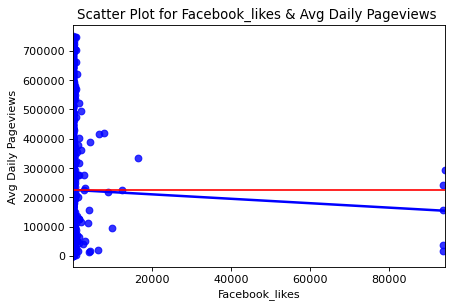

try:  12
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.5588
Date:                 Tue, 17 May 2022   Prob (F-statistic):              0.455
Time:                         21:57:35   Log-Likelihood:                -10264.
No. Observations:                  750   AIC:                         2.053e+04
Df Residuals:                      748   BIC:                         2.054e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.256e+05

,Avg_Daily_Pageviews,Facebook_likes,Website
0,293820,94200,www.blogspot.qa
1,241790,93700,www.blogspot.ch
2,37237,93700,www.blogspot.ug
3,18874,93700,www.blogspot.sn
4,157113,93700,www.blogspot.rs
...,...,...,...
745,24995,1,www.vb.kg
746,27035,1,www.politis.com.cy
747,261003,1,www.diariocorreo.pe
748,383557,1,www.depor.com


195571.06515580736


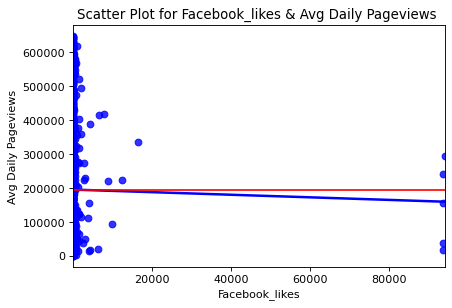

try:  13
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.1916
Date:                 Tue, 17 May 2022   Prob (F-statistic):              0.662
Time:                         21:57:35   Log-Likelihood:                -9554.1
No. Observations:                  706   AIC:                         1.911e+04
Df Residuals:                      704   BIC:                         1.912e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.959e+05

,Avg_Daily_Pageviews,Facebook_likes,Website
0,293820,94200,www.blogspot.qa
1,241790,93700,www.blogspot.ch
2,37237,93700,www.blogspot.ug
3,18874,93700,www.blogspot.sn
4,157113,93700,www.blogspot.rs
...,...,...,...
701,24995,1,www.vb.kg
702,27035,1,www.politis.com.cy
703,261003,1,www.diariocorreo.pe
704,383557,1,www.depor.com


170387.61052631578


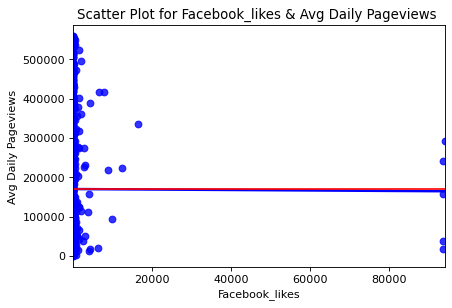

try:  14
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                  0.006289
Date:                 Tue, 17 May 2022   Prob (F-statistic):              0.937
Time:                         21:57:36   Log-Likelihood:                -8895.7
No. Observations:                  665   AIC:                         1.780e+04
Df Residuals:                      663   BIC:                         1.780e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.704e+05

,Avg_Daily_Pageviews,Facebook_likes,Website
0,293820,94200,www.blogspot.qa
1,241790,93700,www.blogspot.ch
2,37237,93700,www.blogspot.ug
3,18874,93700,www.blogspot.sn
4,157113,93700,www.blogspot.rs
...,...,...,...
660,24995,1,www.vb.kg
661,27035,1,www.politis.com.cy
662,261003,1,www.diariocorreo.pe
663,383557,1,www.depor.com


151270.9556259905


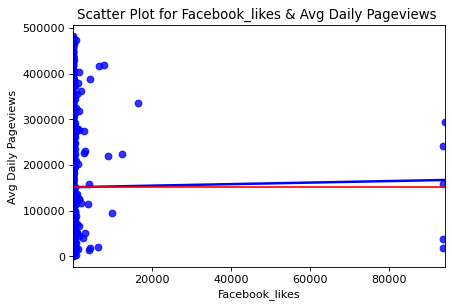

try:  15
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                   0.06746
Date:                 Tue, 17 May 2022   Prob (F-statistic):              0.795
Time:                         21:57:36   Log-Likelihood:                -8353.9
No. Observations:                  631   AIC:                         1.671e+04
Df Residuals:                      629   BIC:                         1.672e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.511e+05

,Avg_Daily_Pageviews,Facebook_likes,Website
0,293820,94200,www.blogspot.qa
1,241790,93700,www.blogspot.ch
2,37237,93700,www.blogspot.ug
3,18874,93700,www.blogspot.sn
4,157113,93700,www.blogspot.rs
...,...,...,...
626,24995,1,www.vb.kg
627,27035,1,www.politis.com.cy
628,261003,1,www.diariocorreo.pe
629,383557,1,www.depor.com


137717.65397350994


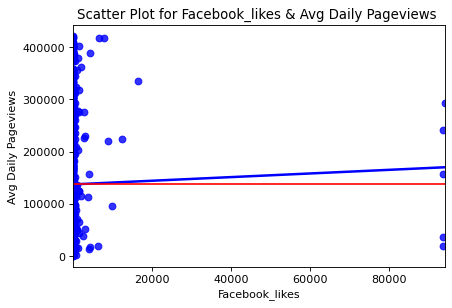

try:  16
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.3559
Date:                 Tue, 17 May 2022   Prob (F-statistic):              0.551
Time:                         21:57:36   Log-Likelihood:                -7933.3
No. Observations:                  604   AIC:                         1.587e+04
Df Residuals:                      602   BIC:                         1.588e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.374e+05

,Avg_Daily_Pageviews,Facebook_likes,Website
0,293820,94200,www.blogspot.qa
1,241790,93700,www.blogspot.ch
2,37237,93700,www.blogspot.ug
3,18874,93700,www.blogspot.sn
4,157113,93700,www.blogspot.rs
...,...,...,...
598,32647,1,www.gossip-lankanews.com
599,24995,1,www.vb.kg
600,27035,1,www.politis.com.cy
601,261003,1,www.diariocorreo.pe


123170.44405594406


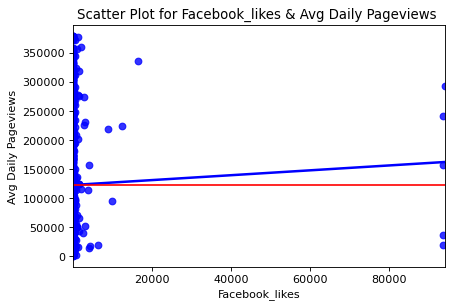

try:  17
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.6570
Date:                 Tue, 17 May 2022   Prob (F-statistic):              0.418
Time:                         21:57:36   Log-Likelihood:                -7445.2
No. Observations:                  572   AIC:                         1.489e+04
Df Residuals:                      570   BIC:                         1.490e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.227e+05

,Avg_Daily_Pageviews,Facebook_likes,Website
0,293820,94200,www.blogspot.qa
1,241790,93700,www.blogspot.ch
2,37237,93700,www.blogspot.ug
3,18874,93700,www.blogspot.sn
4,157113,93700,www.blogspot.rs
...,...,...,...
567,32647,1,www.gossip-lankanews.com
568,24995,1,www.vb.kg
569,27035,1,www.politis.com.cy
570,261003,1,www.diariocorreo.pe


111809.0750915751


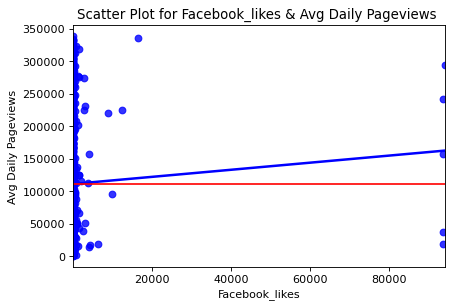

try:  18
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     1.367
Date:                 Tue, 17 May 2022   Prob (F-statistic):              0.243
Time:                         21:57:36   Log-Likelihood:                -7048.0
No. Observations:                  546   AIC:                         1.410e+04
Df Residuals:                      544   BIC:                         1.411e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.112e+05

,Avg_Daily_Pageviews,Facebook_likes,Website
0,293820,94200,www.blogspot.qa
1,241790,93700,www.blogspot.ch
2,37237,93700,www.blogspot.ug
3,18874,93700,www.blogspot.sn
4,157113,93700,www.blogspot.rs
...,...,...,...
541,32647,1,www.gossip-lankanews.com
542,24995,1,www.vb.kg
543,27035,1,www.politis.com.cy
544,261003,1,www.diariocorreo.pe


102604.52963671128


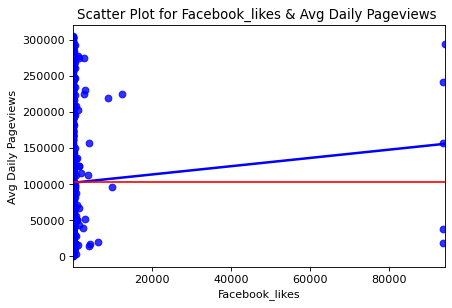

try:  19
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     1.806
Date:                 Tue, 17 May 2022   Prob (F-statistic):              0.180
Time:                         21:57:37   Log-Likelihood:                -6703.1
No. Observations:                  523   AIC:                         1.341e+04
Df Residuals:                      521   BIC:                         1.342e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        1.02e+05

,Avg_Daily_Pageviews,Facebook_likes,Website
0,293820,94200,www.blogspot.qa
1,241790,93700,www.blogspot.ch
2,37237,93700,www.blogspot.ug
3,18874,93700,www.blogspot.sn
4,157113,93700,www.blogspot.rs
...,...,...,...
518,32647,1,www.gossip-lankanews.com
519,24995,1,www.vb.kg
520,27035,1,www.politis.com.cy
521,261003,1,www.diariocorreo.pe


93455.77555110221


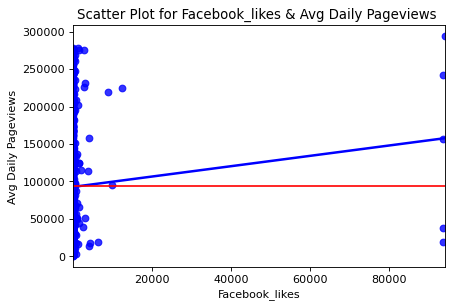

try:  20
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.006
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     3.211
Date:                 Tue, 17 May 2022   Prob (F-statistic):             0.0738
Time:                         21:57:37   Log-Likelihood:                -6344.9
No. Observations:                  499   AIC:                         1.269e+04
Df Residuals:                      497   BIC:                         1.270e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       9.265e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,293820,94200,www.blogspot.qa
1,241790,93700,www.blogspot.ch
2,37237,93700,www.blogspot.ug
3,18874,93700,www.blogspot.sn
4,157113,93700,www.blogspot.rs
...,...,...,...
493,130245,1,www.metrodeal.com
494,32647,1,www.gossip-lankanews.com
495,24995,1,www.vb.kg
496,27035,1,www.politis.com.cy


83486.46610169491


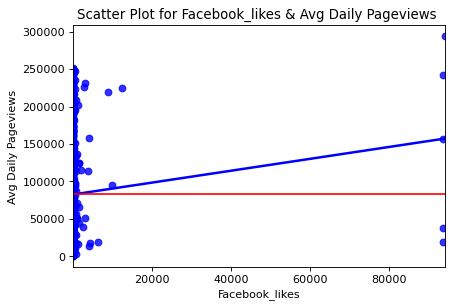

try:  21
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.012
Model:                             OLS   Adj. R-squared:                  0.009
Method:                  Least Squares   F-statistic:                     5.481
Date:                 Tue, 17 May 2022   Prob (F-statistic):             0.0196
Time:                         21:57:37   Log-Likelihood:                -5940.3
No. Observations:                  472   AIC:                         1.188e+04
Df Residuals:                      470   BIC:                         1.189e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       8.252e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
1,241790,93700,www.blogspot.ch
2,37237,93700,www.blogspot.ug
4,157113,93700,www.blogspot.rs
5,224446,12400,www.zoom.lk
6,95389,9930,www.tert.am
...,...,...,...
467,130245,1,www.metrodeal.com
468,32647,1,www.gossip-lankanews.com
469,24995,1,www.vb.kg
470,27035,1,www.politis.com.cy


74023.21171171172


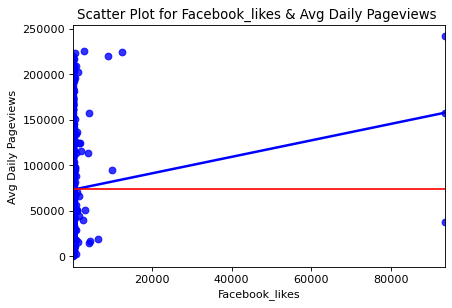

try:  22
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.013
Model:                             OLS   Adj. R-squared:                  0.011
Method:                  Least Squares   F-statistic:                     5.805
Date:                 Tue, 17 May 2022   Prob (F-statistic):             0.0164
Time:                         21:57:37   Log-Likelihood:                -5521.2
No. Observations:                  444   AIC:                         1.105e+04
Df Residuals:                      442   BIC:                         1.105e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.324e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
2,157113,93700,www.blogspot.rs
4,95389,9930,www.tert.am
6,19384,6360,www.alfajertv.com
7,17161,4280,www.paltimes.net
...,...,...,...
439,130245,1,www.metrodeal.com
440,32647,1,www.gossip-lankanews.com
441,24995,1,www.vb.kg
442,27035,1,www.politis.com.cy


65725.30935251799


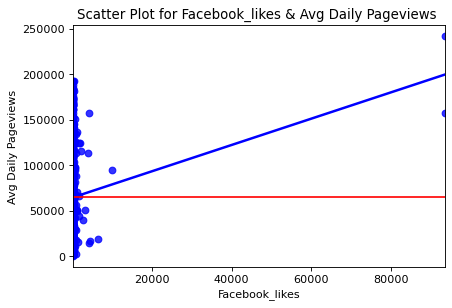

try:  23
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.031
Model:                             OLS   Adj. R-squared:                  0.029
Method:                  Least Squares   F-statistic:                     13.48
Date:                 Tue, 17 May 2022   Prob (F-statistic):           0.000273
Time:                         21:57:37   Log-Likelihood:                -5119.7
No. Observations:                  417   AIC:                         1.024e+04
Df Residuals:                      415   BIC:                         1.025e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.482e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,157113,93700,www.blogspot.rs
2,95389,9930,www.tert.am
3,19384,6360,www.alfajertv.com
4,17161,4280,www.paltimes.net
...,...,...,...
412,130245,1,www.metrodeal.com
413,32647,1,www.gossip-lankanews.com
414,24995,1,www.vb.kg
415,27035,1,www.politis.com.cy


60859.26


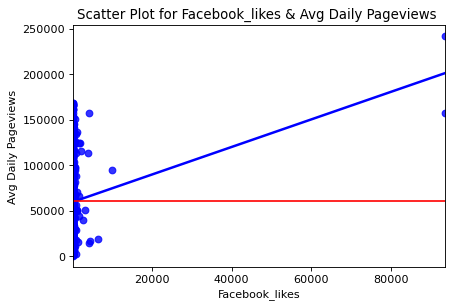

try:  24
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.043
Model:                             OLS   Adj. R-squared:                  0.041
Method:                  Least Squares   F-statistic:                     17.97
Date:                 Tue, 17 May 2022   Prob (F-statistic):           2.80e-05
Time:                         21:57:38   Log-Likelihood:                -4872.1
No. Observations:                  400   AIC:                             9748.
Df Residuals:                      398   BIC:                             9756.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.987e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,157113,93700,www.blogspot.rs
2,95389,9930,www.tert.am
3,19384,6360,www.alfajertv.com
4,17161,4280,www.paltimes.net
...,...,...,...
395,130245,1,www.metrodeal.com
396,32647,1,www.gossip-lankanews.com
397,24995,1,www.vb.kg
398,27035,1,www.politis.com.cy


57673.64432989691


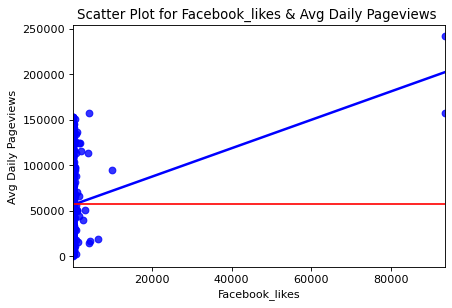

try:  25
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.053
Model:                             OLS   Adj. R-squared:                  0.051
Method:                  Least Squares   F-statistic:                     21.79
Date:                 Tue, 17 May 2022   Prob (F-statistic):           4.20e-06
Time:                         21:57:38   Log-Likelihood:                -4700.2
No. Observations:                  388   AIC:                             9404.
Df Residuals:                      386   BIC:                             9412.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.662e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,157113,93700,www.blogspot.rs
2,95389,9930,www.tert.am
3,19384,6360,www.alfajertv.com
4,17161,4280,www.paltimes.net
...,...,...,...
383,130245,1,www.metrodeal.com
384,32647,1,www.gossip-lankanews.com
385,24995,1,www.vb.kg
386,27035,1,www.politis.com.cy


55228.47619047619


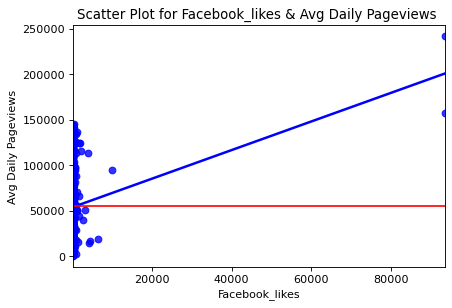

try:  26
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.061
Model:                             OLS   Adj. R-squared:                  0.058
Method:                  Least Squares   F-statistic:                     24.35
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.21e-06
Time:                         21:57:38   Log-Likelihood:                -4560.5
No. Observations:                  378   AIC:                             9125.
Df Residuals:                      376   BIC:                             9133.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.416e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,157113,93700,www.blogspot.rs
2,95389,9930,www.tert.am
3,19384,6360,www.alfajertv.com
4,17161,4280,www.paltimes.net
...,...,...,...
373,130245,1,www.metrodeal.com
374,32647,1,www.gossip-lankanews.com
375,24995,1,www.vb.kg
376,27035,1,www.politis.com.cy


51920.057692307695


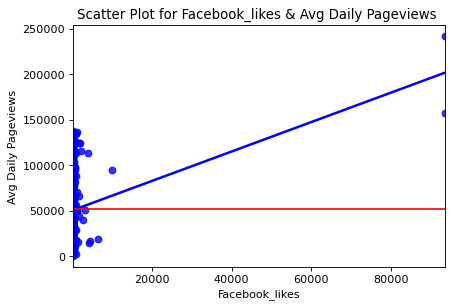

try:  27
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.076
Model:                             OLS   Adj. R-squared:                  0.073
Method:                  Least Squares   F-statistic:                     29.71
Date:                 Tue, 17 May 2022   Prob (F-statistic):           9.28e-08
Time:                         21:57:38   Log-Likelihood:                -4365.6
No. Observations:                  364   AIC:                             8735.
Df Residuals:                      362   BIC:                             8743.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.078e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,157113,93700,www.blogspot.rs
2,95389,9930,www.tert.am
3,19384,6360,www.alfajertv.com
4,17161,4280,www.paltimes.net
...,...,...,...
358,80086,1,www.ananmanan.lk
360,32647,1,www.gossip-lankanews.com
361,24995,1,www.vb.kg
362,27035,1,www.politis.com.cy


48404.20630372493


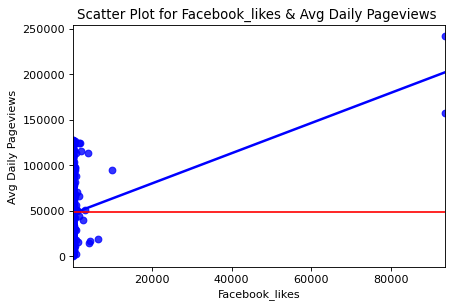

try:  28
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.097
Model:                             OLS   Adj. R-squared:                  0.094
Method:                  Least Squares   F-statistic:                     37.15
Date:                 Tue, 17 May 2022   Prob (F-statistic):           2.91e-09
Time:                         21:57:38   Log-Likelihood:                -4155.7
No. Observations:                  349   AIC:                             8315.
Df Residuals:                      347   BIC:                             8323.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        4.72e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,157113,93700,www.blogspot.rs
2,95389,9930,www.tert.am
3,19384,6360,www.alfajertv.com
4,17161,4280,www.paltimes.net
...,...,...,...
344,80086,1,www.ananmanan.lk
345,32647,1,www.gossip-lankanews.com
346,24995,1,www.vb.kg
347,27035,1,www.politis.com.cy


44776.52852852853


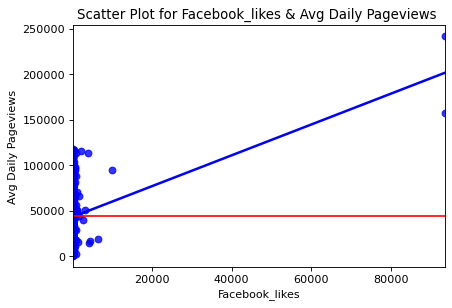

try:  29
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.125
Model:                             OLS   Adj. R-squared:                  0.122
Method:                  Least Squares   F-statistic:                     47.15
Date:                 Tue, 17 May 2022   Prob (F-statistic):           3.26e-11
Time:                         21:57:39   Log-Likelihood:                -3932.3
No. Observations:                  333   AIC:                             7869.
Df Residuals:                      331   BIC:                             7876.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.351e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,157113,93700,www.blogspot.rs
2,95389,9930,www.tert.am
3,19384,6360,www.alfajertv.com
4,17161,4280,www.paltimes.net
...,...,...,...
328,80086,1,www.ananmanan.lk
329,32647,1,www.gossip-lankanews.com
330,24995,1,www.vb.kg
331,27035,1,www.politis.com.cy


40858.20952380952


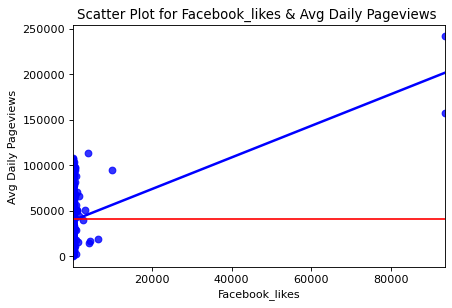

try:  30
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.169
Model:                             OLS   Adj. R-squared:                  0.166
Method:                  Least Squares   F-statistic:                     63.44
Date:                 Tue, 17 May 2022   Prob (F-statistic):           3.09e-14
Time:                         21:57:39   Log-Likelihood:                -3680.7
No. Observations:                  315   AIC:                             7365.
Df Residuals:                      313   BIC:                             7373.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        3.95e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
2,95389,9930,www.tert.am
3,19384,6360,www.alfajertv.com
4,17161,4280,www.paltimes.net
5,14133,3970,www.kuenselonline.com
...,...,...,...
310,80086,1,www.ananmanan.lk
311,32647,1,www.gossip-lankanews.com
312,24995,1,www.vb.kg
313,27035,1,www.politis.com.cy


37809.694352159466


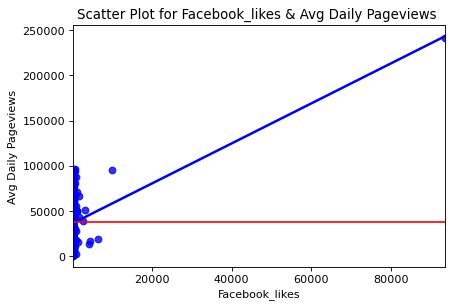

try:  31
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.176
Model:                             OLS   Adj. R-squared:                  0.173
Method:                  Least Squares   F-statistic:                     63.70
Date:                 Tue, 17 May 2022   Prob (F-statistic):           3.13e-14
Time:                         21:57:39   Log-Likelihood:                -3487.0
No. Observations:                  301   AIC:                             6978.
Df Residuals:                      299   BIC:                             6985.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.672e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,95389,9930,www.tert.am
2,19384,6360,www.alfajertv.com
3,17161,4280,www.paltimes.net
4,14133,3970,www.kuenselonline.com
...,...,...,...
296,80086,1,www.ananmanan.lk
297,32647,1,www.gossip-lankanews.com
298,24995,1,www.vb.kg
299,27035,1,www.politis.com.cy


36309.04778156996


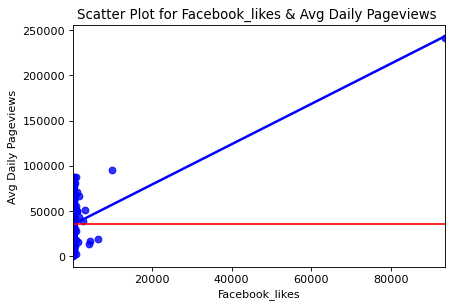

try:  32
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.198
Model:                             OLS   Adj. R-squared:                  0.195
Method:                  Least Squares   F-statistic:                     71.90
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.16e-15
Time:                         21:57:39   Log-Likelihood:                -3378.6
No. Observations:                  293   AIC:                             6761.
Df Residuals:                      291   BIC:                             6769.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        3.52e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,95389,9930,www.tert.am
2,19384,6360,www.alfajertv.com
3,17161,4280,www.paltimes.net
4,14133,3970,www.kuenselonline.com
...,...,...,...
288,80086,1,www.ananmanan.lk
289,32647,1,www.gossip-lankanews.com
290,24995,1,www.vb.kg
291,27035,1,www.politis.com.cy


35066.70279720279


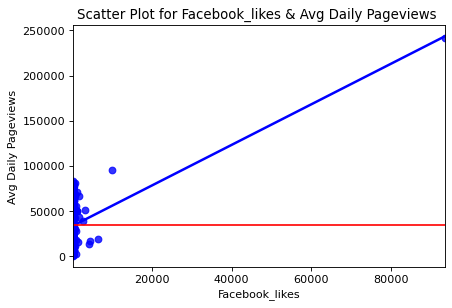

try:  33
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.219
Model:                             OLS   Adj. R-squared:                  0.216
Method:                  Least Squares   F-statistic:                     79.63
Date:                 Tue, 17 May 2022   Prob (F-statistic):           5.72e-17
Time:                         21:57:39   Log-Likelihood:                -3285.2
No. Observations:                  286   AIC:                             6574.
Df Residuals:                      284   BIC:                             6582.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.393e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,95389,9930,www.tert.am
2,19384,6360,www.alfajertv.com
3,17161,4280,www.paltimes.net
4,14133,3970,www.kuenselonline.com
...,...,...,...
281,80086,1,www.ananmanan.lk
282,32647,1,www.gossip-lankanews.com
283,24995,1,www.vb.kg
284,27035,1,www.politis.com.cy


34401.30141843972


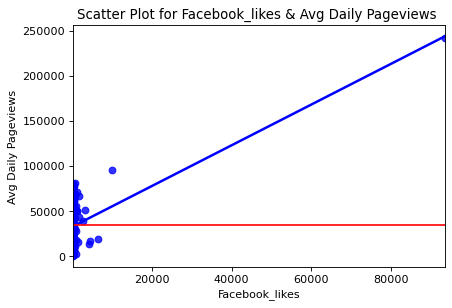

try:  34
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.231
Model:                             OLS   Adj. R-squared:                  0.228
Method:                  Least Squares   F-statistic:                     84.19
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.02e-17
Time:                         21:57:40   Log-Likelihood:                -3232.7
No. Observations:                  282   AIC:                             6469.
Df Residuals:                      280   BIC:                             6477.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.324e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,95389,9930,www.tert.am
2,19384,6360,www.alfajertv.com
3,17161,4280,www.paltimes.net
4,14133,3970,www.kuenselonline.com
...,...,...,...
276,23464,1,www.wheninmanila.com
278,32647,1,www.gossip-lankanews.com
279,24995,1,www.vb.kg
280,27035,1,www.politis.com.cy


33571.80505415163


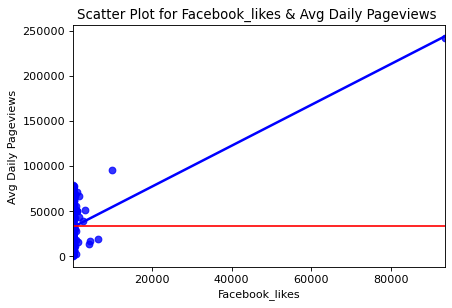

try:  35
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.247
Model:                             OLS   Adj. R-squared:                  0.244
Method:                  Least Squares   F-statistic:                     90.17
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.11e-18
Time:                         21:57:40   Log-Likelihood:                -3167.1
No. Observations:                  277   AIC:                             6338.
Df Residuals:                      275   BIC:                             6345.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.239e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,95389,9930,www.tert.am
2,19384,6360,www.alfajertv.com
3,17161,4280,www.paltimes.net
4,14133,3970,www.kuenselonline.com
...,...,...,...
272,23464,1,www.wheninmanila.com
273,32647,1,www.gossip-lankanews.com
274,24995,1,www.vb.kg
275,27035,1,www.politis.com.cy


33246.88363636364


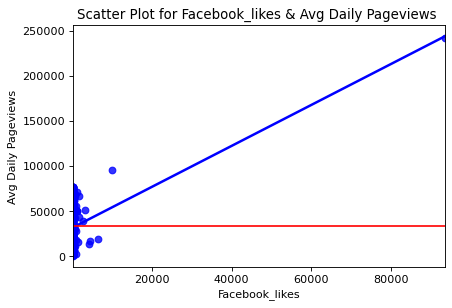

try:  36
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.253
Model:                             OLS   Adj. R-squared:                  0.251
Method:                  Least Squares   F-statistic:                     92.58
Date:                 Tue, 17 May 2022   Prob (F-statistic):           4.63e-19
Time:                         21:57:40   Log-Likelihood:                -3141.0
No. Observations:                  275   AIC:                             6286.
Df Residuals:                      273   BIC:                             6293.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.206e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,95389,9930,www.tert.am
2,19384,6360,www.alfajertv.com
3,17161,4280,www.paltimes.net
4,14133,3970,www.kuenselonline.com
...,...,...,...
270,23464,1,www.wheninmanila.com
271,32647,1,www.gossip-lankanews.com
272,24995,1,www.vb.kg
273,27035,1,www.politis.com.cy


32440.751851851852


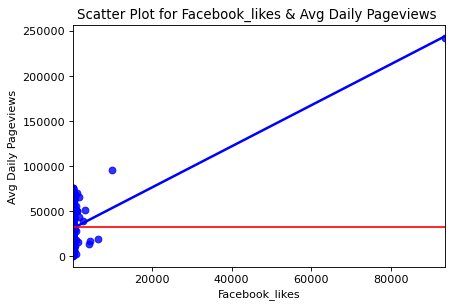

try:  37
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.271
Model:                             OLS   Adj. R-squared:                  0.268
Method:                  Least Squares   F-statistic:                     99.48
Date:                 Tue, 17 May 2022   Prob (F-statistic):           3.95e-20
Time:                         21:57:40   Log-Likelihood:                -3075.7
No. Observations:                  270   AIC:                             6155.
Df Residuals:                      268   BIC:                             6163.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.122e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,95389,9930,www.tert.am
2,19384,6360,www.alfajertv.com
3,17161,4280,www.paltimes.net
4,14133,3970,www.kuenselonline.com
...,...,...,...
265,23464,1,www.wheninmanila.com
266,32647,1,www.gossip-lankanews.com
267,24995,1,www.vb.kg
268,27035,1,www.politis.com.cy


31793.748120300752


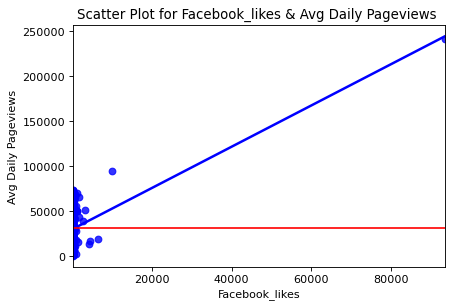

try:  38
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.286
Model:                             OLS   Adj. R-squared:                  0.283
Method:                  Least Squares   F-statistic:                     105.7
Date:                 Tue, 17 May 2022   Prob (F-statistic):           4.56e-21
Time:                         21:57:40   Log-Likelihood:                -3023.3
No. Observations:                  266   AIC:                             6051.
Df Residuals:                      264   BIC:                             6058.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.055e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
2,19384,6360,www.alfajertv.com
3,17161,4280,www.paltimes.net
4,14133,3970,www.kuenselonline.com
5,51277,3050,www.nguoiduatin.vn
...,...,...,...
261,23464,1,www.wheninmanila.com
262,32647,1,www.gossip-lankanews.com
263,24995,1,www.vb.kg
264,27035,1,www.politis.com.cy


31234.152091254753


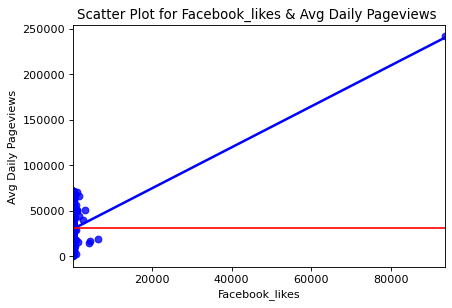

try:  39
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.287
Model:                             OLS   Adj. R-squared:                  0.284
Method:                  Least Squares   F-statistic:                     104.8
Date:                 Tue, 17 May 2022   Prob (F-statistic):           6.70e-21
Time:                         21:57:41   Log-Likelihood:                -2984.3
No. Observations:                  263   AIC:                             5973.
Df Residuals:                      261   BIC:                             5980.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.008e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
258,23464,1,www.wheninmanila.com
259,32647,1,www.gossip-lankanews.com
260,24995,1,www.vb.kg
261,27035,1,www.politis.com.cy


29966.6431372549


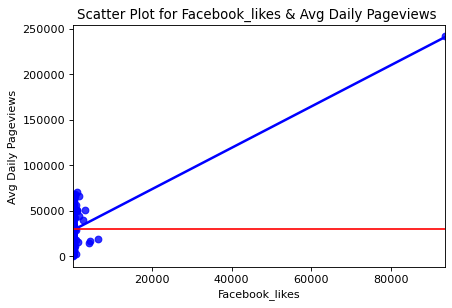

try:  40
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.319
Model:                             OLS   Adj. R-squared:                  0.317
Method:                  Least Squares   F-statistic:                     118.6
Date:                 Tue, 17 May 2022   Prob (F-statistic):           6.57e-23
Time:                         21:57:41   Log-Likelihood:                -2879.9
No. Observations:                  255   AIC:                             5764.
Df Residuals:                      253   BIC:                             5771.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.877e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
250,23464,1,www.wheninmanila.com
251,32647,1,www.gossip-lankanews.com
252,24995,1,www.vb.kg
253,27035,1,www.politis.com.cy


29653.664031620552


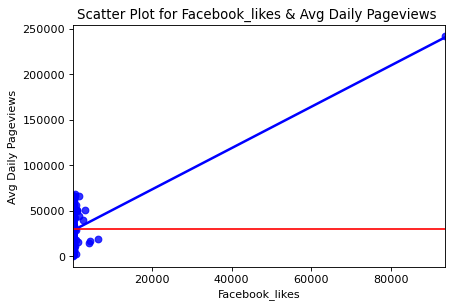

try:  41
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.327
Model:                             OLS   Adj. R-squared:                  0.324
Method:                  Least Squares   F-statistic:                     121.7
Date:                 Tue, 17 May 2022   Prob (F-statistic):           2.49e-23
Time:                         21:57:41   Log-Likelihood:                -2854.1
No. Observations:                  253   AIC:                             5712.
Df Residuals:                      251   BIC:                             5719.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.846e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
248,23464,1,www.wheninmanila.com
249,32647,1,www.gossip-lankanews.com
250,24995,1,www.vb.kg
251,27035,1,www.politis.com.cy


29498.06746031746


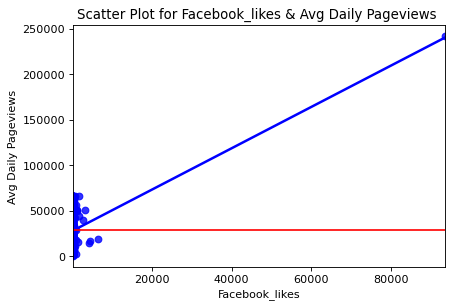

try:  42
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.330
Model:                             OLS   Adj. R-squared:                  0.327
Method:                  Least Squares   F-statistic:                     123.2
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.56e-23
Time:                         21:57:41   Log-Likelihood:                -2841.2
No. Observations:                  252   AIC:                             5686.
Df Residuals:                      250   BIC:                             5693.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        2.83e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
247,23464,1,www.wheninmanila.com
248,32647,1,www.gossip-lankanews.com
249,24995,1,www.vb.kg
250,27035,1,www.politis.com.cy


28898.6814516129


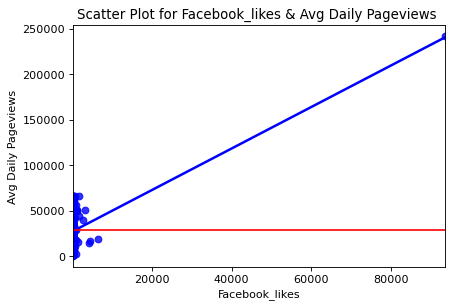

try:  43
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.347
Model:                             OLS   Adj. R-squared:                  0.344
Method:                  Least Squares   F-statistic:                     130.7
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.49e-24
Time:                         21:57:41   Log-Likelihood:                -2789.7
No. Observations:                  248   AIC:                             5583.
Df Residuals:                      246   BIC:                             5590.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.768e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
243,23464,1,www.wheninmanila.com
244,32647,1,www.gossip-lankanews.com
245,24995,1,www.vb.kg
246,27035,1,www.politis.com.cy


27819.697095435684


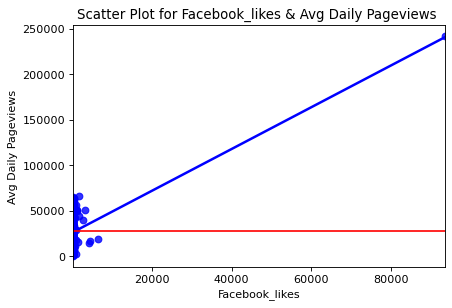

try:  44
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.380
Model:                             OLS   Adj. R-squared:                  0.377
Method:                  Least Squares   F-statistic:                     146.5
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.28e-26
Time:                         21:57:42   Log-Likelihood:                -2698.7
No. Observations:                  241   AIC:                             5401.
Df Residuals:                      239   BIC:                             5408.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.656e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
236,23464,1,www.wheninmanila.com
237,32647,1,www.gossip-lankanews.com
238,24995,1,www.vb.kg
239,27035,1,www.politis.com.cy


26894.84680851064


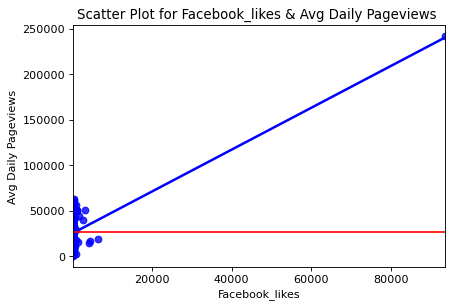

try:  45
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.409
Model:                             OLS   Adj. R-squared:                  0.407
Method:                  Least Squares   F-statistic:                     161.4
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.92e-28
Time:                         21:57:42   Log-Likelihood:                -2620.7
No. Observations:                  235   AIC:                             5245.
Df Residuals:                      233   BIC:                             5252.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.562e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
230,23464,1,www.wheninmanila.com
231,32647,1,www.gossip-lankanews.com
232,24995,1,www.vb.kg
233,27035,1,www.politis.com.cy


25987.5807860262


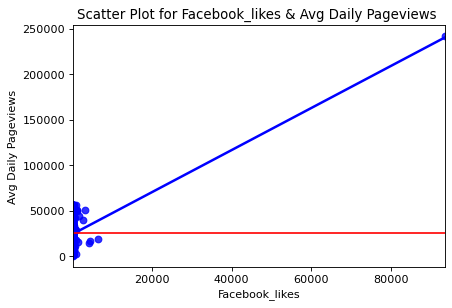

try:  46
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:42   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


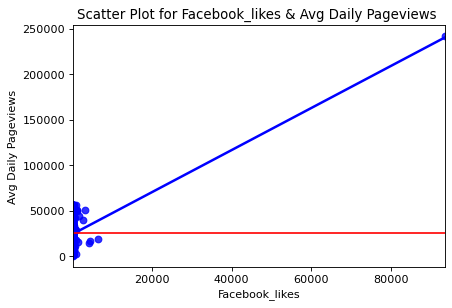

try:  47
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:42   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


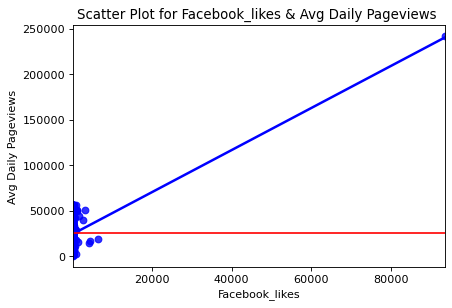

try:  48
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:42   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


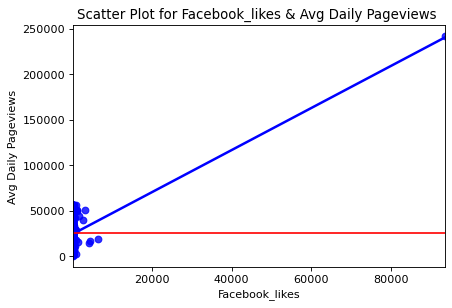

try:  49
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:43   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


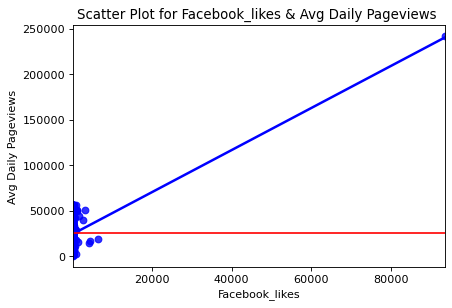

try:  50
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:43   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


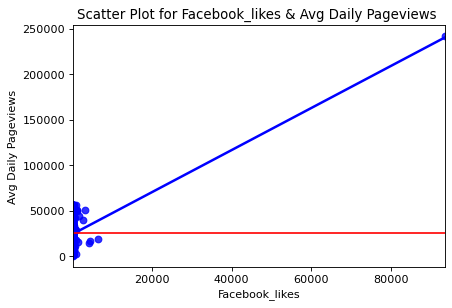

try:  51
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:43   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


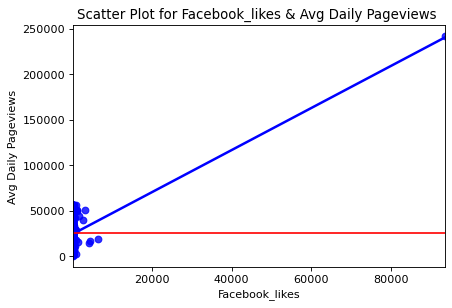

try:  52
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:43   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


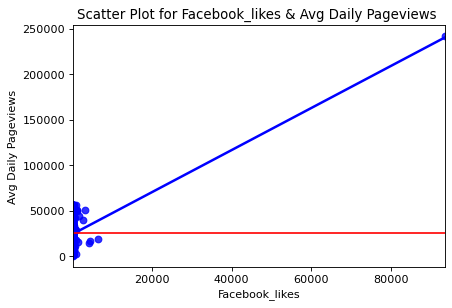

try:  53
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:43   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


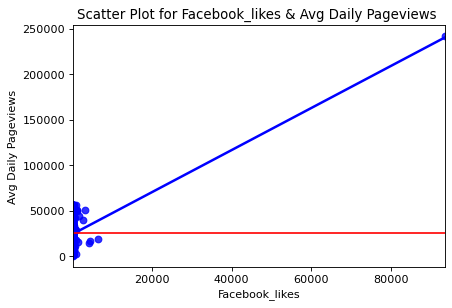

try:  54
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:44   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


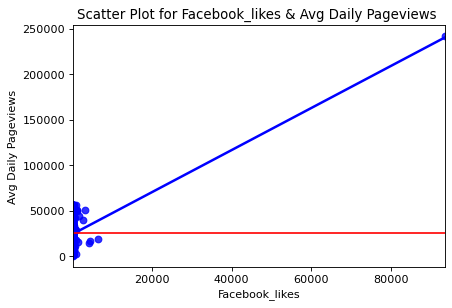

try:  55
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:44   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


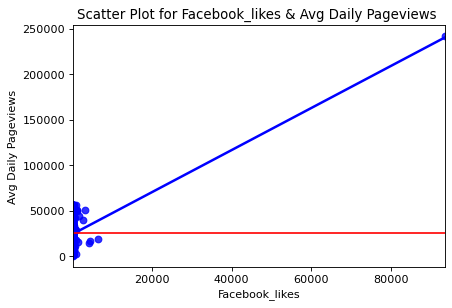

try:  56
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:44   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


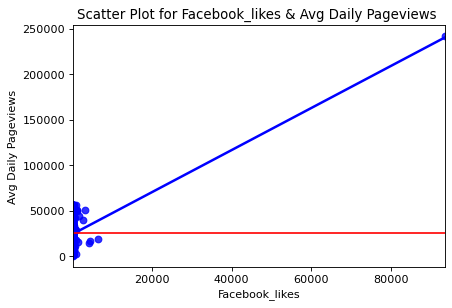

try:  57
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:44   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


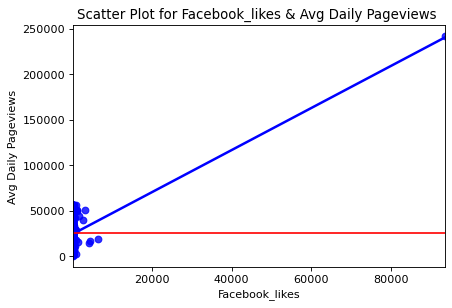

try:  58
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:44   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


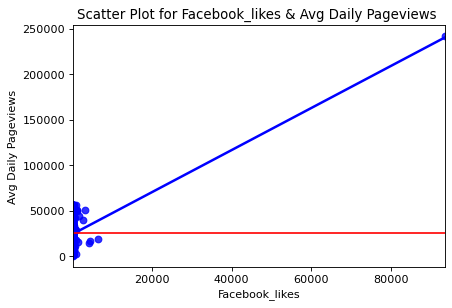

try:  59
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:45   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


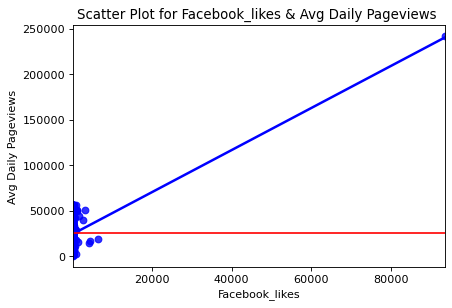

try:  60
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:45   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


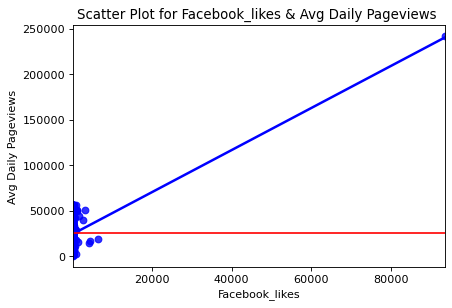

try:  61
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:45   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


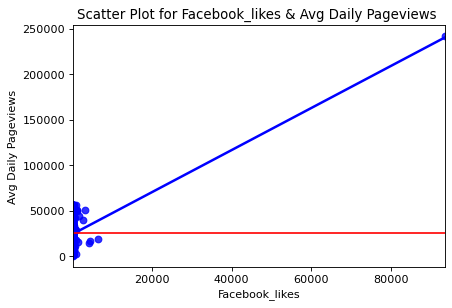

try:  62
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:45   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


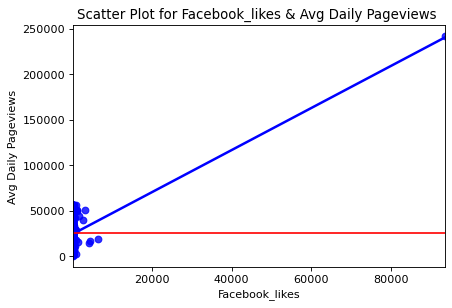

try:  63
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:45   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


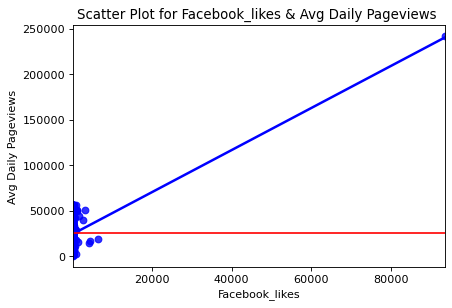

try:  64
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:46   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


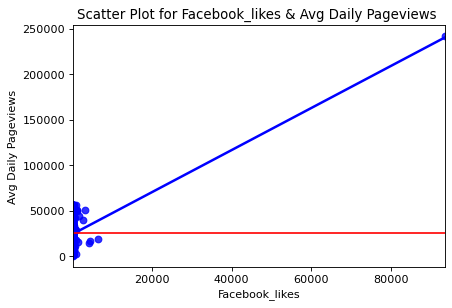

try:  65
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:46   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


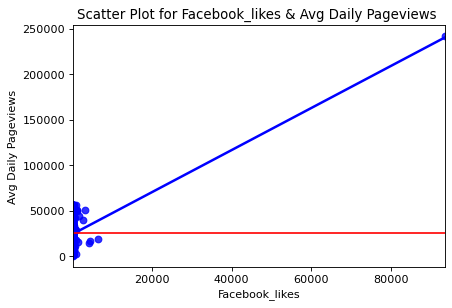

try:  66
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:46   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


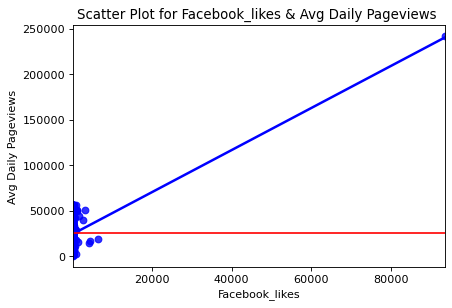

try:  67
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:46   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


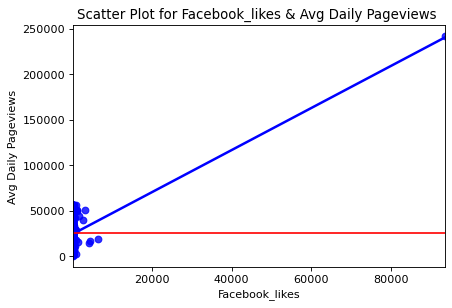

try:  68
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:46   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


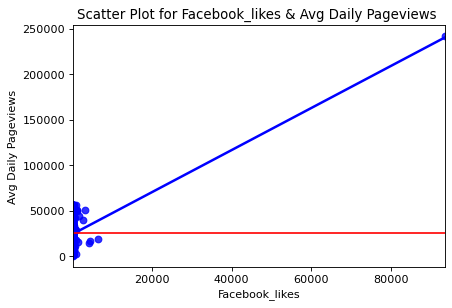

try:  69
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:46   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


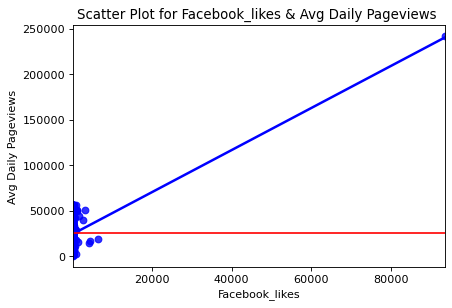

try:  70
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:47   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


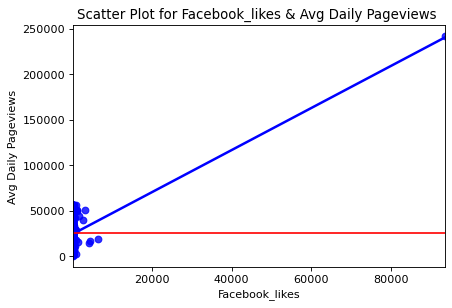

try:  71
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:47   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


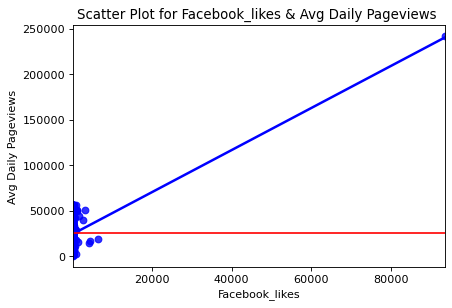

try:  72
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:47   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


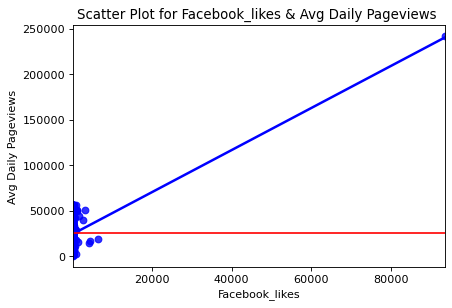

try:  73
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:47   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


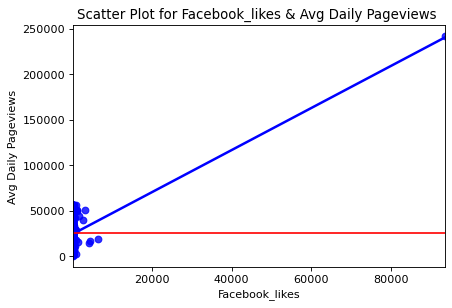

try:  74
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:47   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


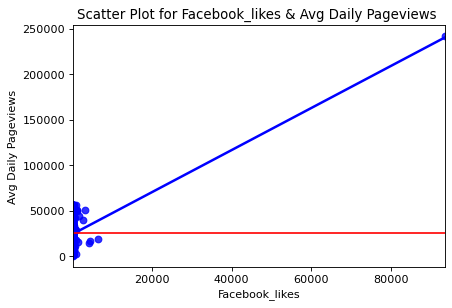

try:  75
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:48   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


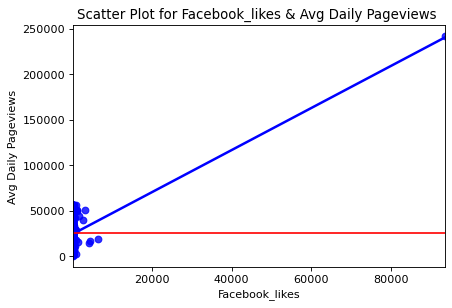

try:  76
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:48   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


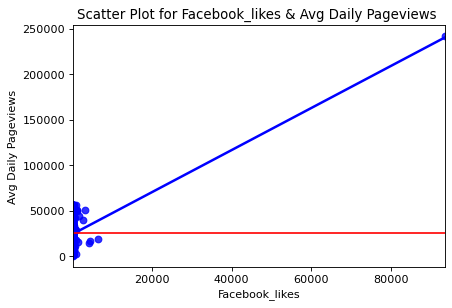

try:  77
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:48   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


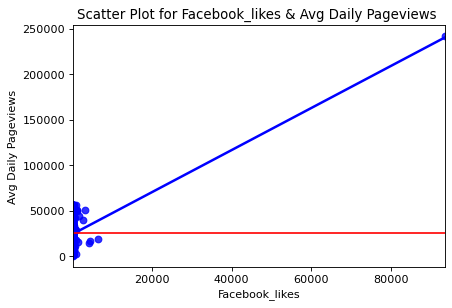

try:  78
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:48   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


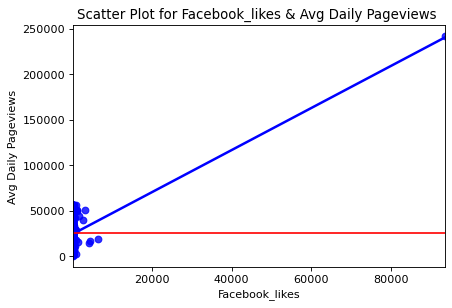

try:  79
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:48   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


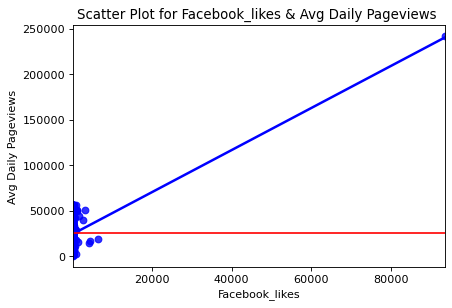

try:  80
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:49   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


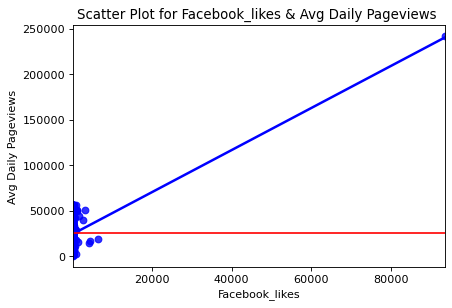

try:  81
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:49   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


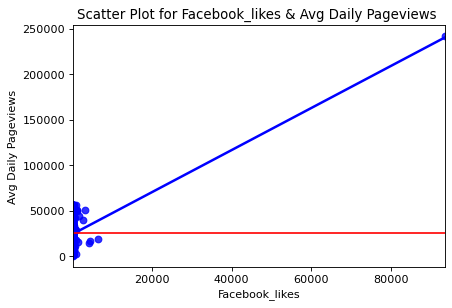

try:  82
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:49   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


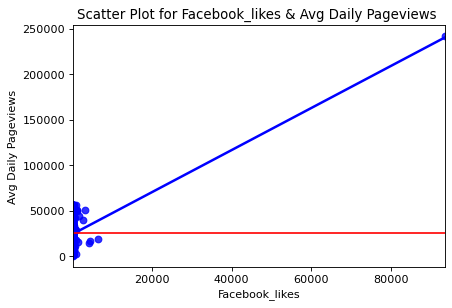

try:  83
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:49   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


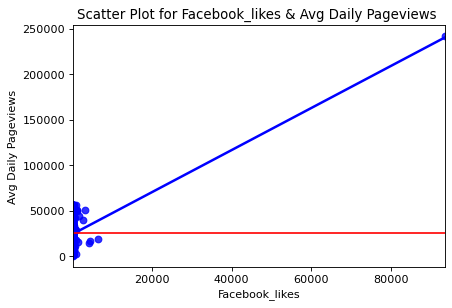

try:  84
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:49   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


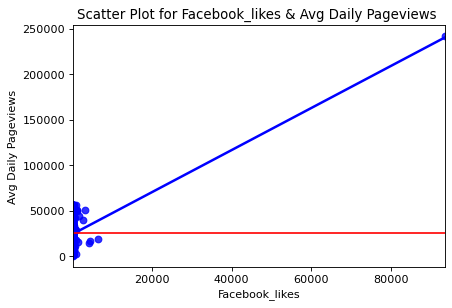

try:  85
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:50   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


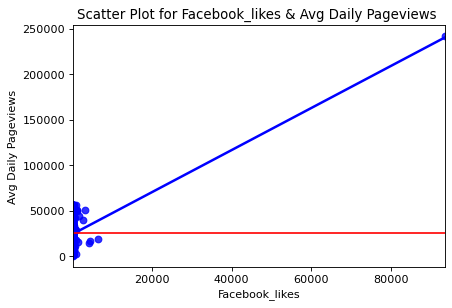

try:  86
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:50   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


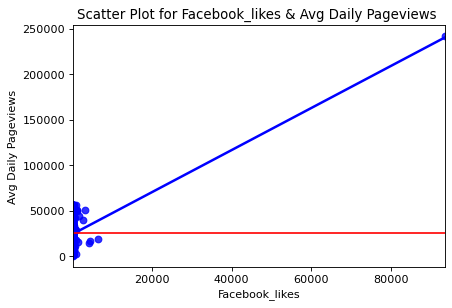

try:  87
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:50   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


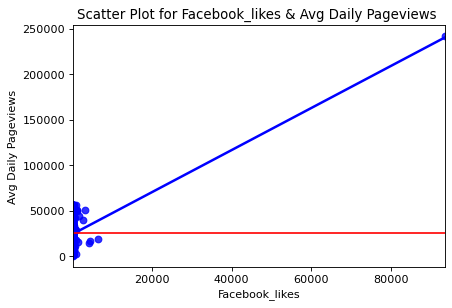

try:  88
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:50   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


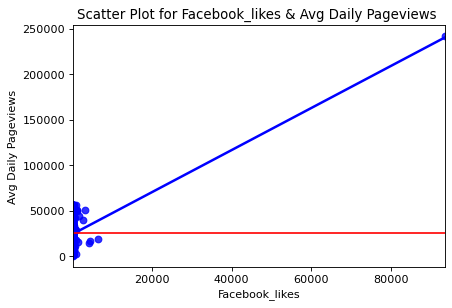

try:  89
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:50   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


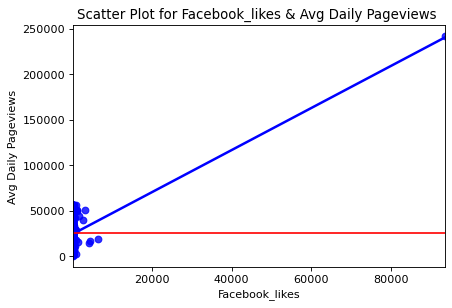

try:  90
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:51   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


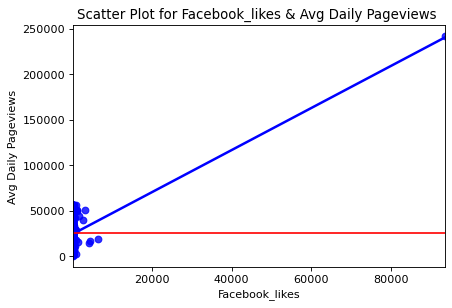

try:  91
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:51   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


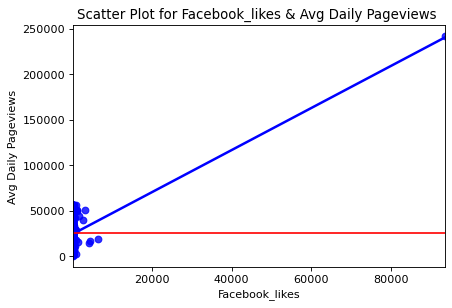

try:  92
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:51   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


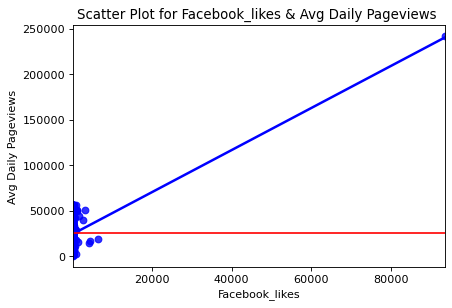

try:  93
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:51   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


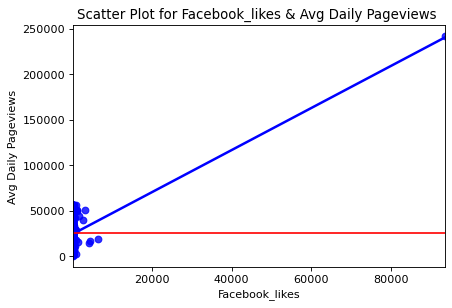

try:  94
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:51   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


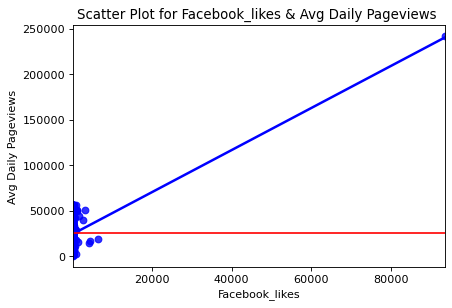

try:  95
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:52   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


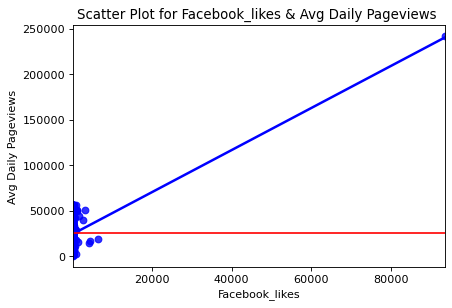

try:  96
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:52   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


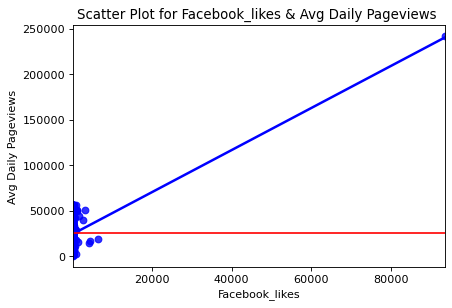

try:  97
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:52   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


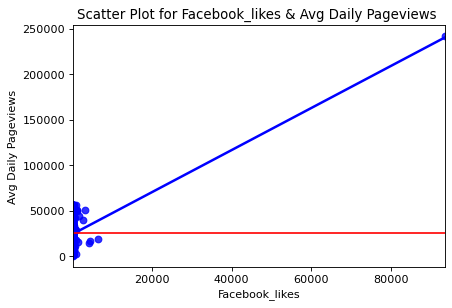

try:  98
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:52   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


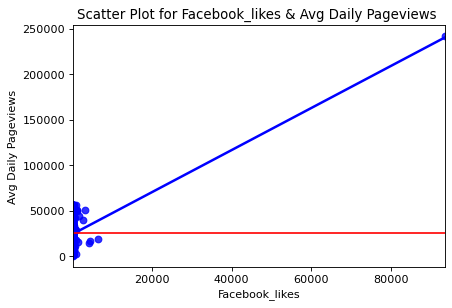

try:  99
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:52   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+04

,Avg_Daily_Pageviews,Facebook_likes,Website
0,241790,93700,www.blogspot.ch
1,19384,6360,www.alfajertv.com
2,17161,4280,www.paltimes.net
3,14133,3970,www.kuenselonline.com
4,51277,3050,www.nguoiduatin.vn
...,...,...,...
224,23464,1,www.wheninmanila.com
225,32647,1,www.gossip-lankanews.com
226,24995,1,www.vb.kg
227,27035,1,www.politis.com.cy


25987.5807860262


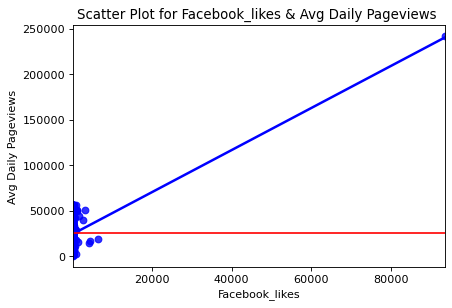

try:  100
                             OLS Regression Results                            
Dep. Variable:     Avg_Daily_Pageviews   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     179.9
Date:                 Tue, 17 May 2022   Prob (F-statistic):           1.35e-30
Time:                         21:57:52   Log-Likelihood:                -2542.4
No. Observations:                  229   AIC:                             5089.
Df Residuals:                      227   BIC:                             5096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.468e+0

In [51]:
#FB
#純刪掉outliers
fb = df[df["Facebook_likes"].str.contains("-")==False]
fb = fb[['Avg_Daily_Pageviews','Facebook_likes','Website']]
fb['Facebook_likes'] = fb['Facebook_likes'].apply(value_to_int)
fb.dropna(inplace=True)
fb.sort_values(by=['Facebook_likes'], ascending = False, inplace=True)
fb.reset_index(inplace = True, drop = True)
fb['Avg_Daily_Pageviews'] = fb['Avg_Daily_Pageviews'].apply(value_to_int)
#fb = fb[100:]
display(fb)
# draw plot
_ = sns.regplot(x='Facebook_likes', y= 'Avg_Daily_Pageviews', data = fb, color = 'b', ci = None)
#plt.plot(x=fb['Google_pluses'],y=fb['Avg_Daily_Pageviews'].mean())
plt.axhline(y=fb['Avg_Daily_Pageviews'].mean(), color='r', linestyle='-')
plt.title('Scatter Plot for Facebook_likes & Avg Daily Pageviews ')
plt.xlabel('Facebook_likes')
plt.ylabel('Avg Daily Pageviews')
plt.show()
# Fit regression model 
fb_result = smf.ols('Avg_Daily_Pageviews~ Facebook_likes', data=fb).fit()
# Inspect the results
print(fb_result.summary())
for i in range(100):
    b1 = fb_result.params[1]
    b0 = fb_result.params[0]
    st1, data1, ss3 = sso.summary_table(fb_result, alpha=0.05)
    SD = data1[:, 10]
    mu = np.mean(SD)
    sigma = np.std(SD)
    fb_c = pd.DataFrame(SD,columns = ['SD'])
    filter = (fb_c['SD'] < -2) | (fb_c['SD'] > 2)
    #print("Outliers by SD = \n")
    #print(fb_c['SD'].loc[filter])
    out_index = fb_c['SD'].loc[filter].index
    #out_index
    out_index = list(out_index)
    print(out_index)
    fb.drop(out_index, axis=0, inplace=True)
    display(fb)
    # draw plot
    _ = sns.regplot(x='Facebook_likes', y= 'Avg_Daily_Pageviews', data = fb, color = 'b', ci = None)
    #plt.plot(x=fb['Google_pluses'],y=fb['Avg_Daily_Pageviews'].mean())
    plt.axhline(y=fb['Avg_Daily_Pageviews'].mean(), color='r', linestyle='-')
    plt.title('Scatter Plot for Facebook_likes & Avg Daily Pageviews ')
    print(fb['Avg_Daily_Pageviews'].mean())
    plt.xlabel('Facebook_likes')
    plt.ylabel('Avg Daily Pageviews')
    plt.show()
    # Fit regression model 
    fb_result = smf.ols('Avg_Daily_Pageviews~ Facebook_likes', data=fb).fit()
    # Inspect the results
    print("try: ",i+1)
    print(fb_result.summary())
    fb.reset_index(inplace = True, drop = True)